<a href="https://colab.research.google.com/github/deboranson/tcc_puc_minas/blob/main/2_Notebook_Life_Ladder_Debora_Lima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# NOTEBOOK ASSOCIADO AO TRABALHO DE CONCLUSÃO DE CURSO DE
# CIÊNCIA DE DADOS E *BIG DATA* - PUC MINAS
# Débora Anson Lima

<hr style="height:0px;border:none;border-top:1px solid #c0c0c0;">

---

## SUMÁRIO

#### 1. IMPORTAÇÃO DE BIBLIOTECAS E DEFINIÇÃO DE PARÂMETROS DO AMBIENTE

#### 2. LISTA DOS *DATASETS* E SEUS *LINKS*

#### 3.  *DATAFRAMES*
- 3.1. *Dataframe* 1 (*df1*)
- 3.2. *Dataframe* 2 (*df2*)
- 3.3. *Dataframe* 3 (*df3*)
- 3.4. *Dataframe* 4 (*df4*)
- 3.5. *Dataframe* 5 (*df5*)
- 3.6. *Dataframe* 6 (*df6*)
- 3.7. *Dataframe* 7 (*df7*)

#### 4. ANÁLISE E EXPLORAÇÃO DOS DADOS (*EDA*)

#### 5.  MODELOS
- 5.1. Modelos *df1*: variáveis *WHR* para a explicação do *Life Ladder* 
- 5.2. Modelos *df2*: variáveis *WHR* (sem o "*Negative affect*") para a explicação do *Life Ladder*
- 5.3. Modelos *df3*: variáveis *WHR* (sem o "*Negative affect*" e o "*Positive affect*") para a explicação do *Life Ladder*
- 5.4. Modelos *df4*: somente indicadores adicionais (*EI*, *GDI*, *VE* e *YNSE*) para a explicação do *Life Ladder*
- 5.5. Modelos *df5*: variáveis *WHR* e indicadores adicionais (*EI*, *GDI*, *VE* e *YNSE*) para a explicação do *Life Ladder*
- 5.6. Modelos *df6*: variáveis *WHR* (sem o "*Negative affect*") e indicadores adicionais (*EI*, *GDI*, *VE* e *YNSE*) para a explicação do *Life Ladder*
- 5.7. Modelos *df7*: variáveis *WHR* (sem o "*Negative affect*" e o "*Positive affect*") e indicadores adicionais (*EI*, *GDI*, *VE* e *YNSE*) para a explicação do *Life Ladder*

#### 6. ANÁLISE DO MELHOR MODELO
- 6.1. *Setup* e comparativo de modelos do *df5*
- 6.2. Métricas do melhor modelo para a base de treinamento e de teste
- 6.3. Gráficos dos modelos individuais componentes da combinação
- 6.4. Gráficos do melhor modelo

#### 7. TESTES ADICIONAIS COM O *DATAFRAME* BASE DO MELHOR MODELO (*df5*)
- 7.1. Modelos executados com alteração do tamanho da base de treino (para 60 e 80%)
- 7.2. Modelos executados com exclusão de multicolinearidade (com limites mínimos de 70, 80 e 90%)
- 7.3. Modelos executados com remoção de *outliers* (com limites máximos de 5 e 10%)
- 7.4. Modelos executados com as três alterações anteriores que obtiveram os maiores R2 na base de teste

---
---

---
#### 1. IMPORTAÇÃO DE BIBLIOTECAS E DEFINIÇÃO DE PARÂMETROS DO AMBIENTE

In [1]:
import pandas as pd

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.regression import *

In [4]:
from functools import reduce

In [ ]:
pip install xlrd==1.2.0

In [ ]:
!pip install shap

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

---

---

#### 2. LISTA DOS *DATASETS* E SEUS *LINKS*

- *World Happiness Report* 2021 (original/adaptado): https://worldhappiness.report/ed/2021/#appendices-and-data / https://github.com/deboranson/tcc/blob/main/DataPanelWHR2021C2.xls
- *Countries*: https://github.com/deboranson/tcc/blob/main/Countries.xlsx
- *Education Index* (*EI*) (original/adaptado): http://hdr.undp.org/en/indicators/103706# / https://github.com/deboranson/tcc/blob/main/Education.xlsx
- *Gender Development Index* (*GDI*) (original/adaptado): http://hdr.undp.org/en/indicators/137906# / https://github.com/deboranson/tcc/blob/main/Gender.xlsx
- *Vulnerable Employment* (*VE*) (original/adaptado): http://hdr.undp.org/en/indicators/43006# / https://github.com/deboranson/tcc/blob/main/Vulnerable_employment.xlsx
- *Youth not in school or employment* (*YNSE*) (original/adaptado): http://hdr.undp.org/en/indicators/147906# / https://github.com/deboranson/tcc/blob/main/Youth.xlsx

---

---

#### 3.  *DATAFRAMES*

3.1. *Dataframe* 1 (*df1*)






3.1.1. Criação do *dataframe* 1 (variáveis *WHR*) 

In [8]:
url1 = 'https://raw.githubusercontent.com/deboranson/tcc_puc_minas/main/3_DataPanelWHR2021C2.xls'
df1 = pd.read_excel(url1)
df1.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919


In [9]:
df1 = df1.rename(columns={"Country name": "country"})
df1.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919


In [10]:
df1['country'] = df1['country'].str.replace(" ","")

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


3.1.2. Padronização dos nomes dos países do *df1* com os dos demais *datrafames*

In [12]:
urlcn ='https://github.com/deboranson/tcc_puc_minas/blob/main/8_Countries.xlsx?raw=true'
dfcn = pd.read_excel(urlcn)
dfcn.head()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola


In [13]:
dfcn['country'] = dfcn['country'].str.replace(" ","")

In [14]:
def mismatch (df1, dfcn, only_out=True):
    out_num = 0
    for i in df1.country.unique():
        if i in dfcn.country.unique():
            if not only_out:
                print("in :",i)
        else:
            print(i)
            out_num += 1
    print(f"{out_num} nomes diferentes entre os dataframes".upper())
    
mismatch(df1, dfcn, True)

Bolivia
Congo(Brazzaville)
Congo(Kinshasa)
CzechRepublic
HongKongS.A.R.ofChina
Iran
IvoryCoast
Kosovo
Laos
Moldova
NorthCyprus
PalestinianTerritories
Russia
Somalilandregion
SouthKorea
Swaziland
Syria
TaiwanProvinceofChina
Tanzania
Venezuela
Vietnam
21 NOMES DIFERENTES ENTRE OS DATAFRAMES


- Dicionário para correção dos nomes dos países (excluindo os que não possuem correspondência)






In [15]:
dict_countries = {"Bolivia" : "Bolivia(PlurinationalStateof)", 
"CzechRepublic" : "Czechia", 
"HongKongS.A.R.ofChina" : "HongKong,China(SAR)", 
"Iran" : "Iran (IslamicRepublicof)", 
"IvoryCoast" : "Côted'Ivoire", 
"Laos" : "LaoPeople'sDemocraticRepublic", 
"Moldova" : "Moldova(Republicof)", 
"PalestinianTerritories" : "Palestine,Stateof", 
"Russia" : "RussianFederation",
"SouthKorea" : "Korea(Republicof)",
"Syria" : "SyrianArabRepublic", 
"Tanzania" : "Tanzania(UnitedRepublicof)", 
"Venezuela" : "Venezuela(BolivarianRepublicof)", 
"Vietnam" : "VietNam"}

df1['country'] = df1['country'].map(dict_countries).fillna(df1['country'])
df1.sample(30)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1018,Luxembourg,2011,7.101400,11.594556,0.934091,71.879997,0.961831,0.105871,0.388171,0.836459,0.200137
477,DominicanRepublic,2015,5.061862,9.637460,0.893198,64.900002,0.856025,-0.065387,0.755288,0.713908,0.295253
1183,Myanmar,2013,4.175671,8.230396,0.756725,57.380001,0.775448,0.689318,0.637766,0.803302,0.217311
323,Chad,2016,4.029350,7.430738,0.616205,47.200001,0.525222,0.052052,0.819789,0.582458,0.467567
824,Italy,2015,5.847684,10.607694,0.908987,73.000000,0.574766,-0.064207,0.912753,0.691772,0.329209
460,Denmark,2017,7.593702,10.916268,0.952100,72.099998,0.955416,0.155435,0.181148,0.823667,0.205775
18,Albania,2014,4.813763,9.378244,0.625587,67.519997,0.734648,-0.024666,0.882704,0.684911,0.334543
133,Belarus,2006,5.657650,9.489099,0.917899,61.099998,0.707080,-0.246003,0.708275,0.605487,0.269400
798,Ireland,2019,7.254841,11.371147,0.943726,72.400002,0.892459,0.073613,0.372804,0.807015,0.223300
522,ElSalvador,2015,6.018496,9.004916,0.790755,65.199997,0.733356,-0.156171,0.804544,0.825734,0.332647


3.1.3. Adequações do *df1*

In [16]:
df1.isna().sum()

country                               0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [17]:
df1 = df1.dropna()

In [18]:
df1['country-year'] = df1['country'] + df1['year'].astype(str)
df1.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,country-year
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195,Afghanistan2008
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092,Afghanistan2009
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324,Afghanistan2010
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175,Afghanistan2011
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919,Afghanistan2012


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 0 to 1948
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           1708 non-null   object 
 1   year                              1708 non-null   int64  
 2   Life Ladder                       1708 non-null   float64
 3   Log GDP per capita                1708 non-null   float64
 4   Social support                    1708 non-null   float64
 5   Healthy life expectancy at birth  1708 non-null   float64
 6   Freedom to make life choices      1708 non-null   float64
 7   Generosity                        1708 non-null   float64
 8   Perceptions of corruption         1708 non-null   float64
 9   Positive affect                   1708 non-null   float64
 10  Negative affect                   1708 non-null   float64
 11  country-year                      1708 non-null   object 
dtypes: flo

In [20]:
df1 = df1.set_index('country-year')
df1.sample(50)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
country-year,,,,,,,,,,,
NewZealand2018,NewZealand,2018,7.370286,10.660436,0.953863,73.199997,0.949300,0.119827,0.206580,0.845363,0.167951
Slovenia2009,Slovenia,2009,5.830161,10.410269,0.918697,68.900002,0.895957,-0.018933,0.803634,0.640713,0.303117
Senegal2011,Senegal,2011,3.834202,7.903617,0.602409,56.560001,0.640890,-0.160456,0.869894,0.751883,0.180027
CentralAfricanRepublic2017,CentralAfricanRepublic,2017,3.475862,6.816519,0.319589,45.200001,0.645252,0.072786,0.889566,0.613865,0.599335
Ecuador2009,Ecuador,2009,6.021803,9.225117,0.779398,66.620003,0.736881,-0.108082,0.774305,0.840363,0.255968
BurkinaFaso2012,BurkinaFaso,2012,3.955008,7.519517,0.743766,50.779999,0.621849,-0.069597,0.726287,0.544851,0.299723
Lithuania2011,Lithuania,2011,5.432437,10.166590,0.911411,64.699997,0.565797,-0.147912,0.963512,0.569533,0.274637
Colombia2006,Colombia,2006,6.024943,9.277375,0.910293,65.220001,0.804662,-0.014981,0.807830,0.799651,0.325588
Ecuador2006,Ecuador,2006,5.024191,9.185779,0.910188,66.080002,0.671075,-0.090794,0.900687,0.824870,0.356847


In [21]:
df1 = df1.drop(columns = ['country','year'])

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1708 entries, Afghanistan2008 to Zimbabwe2020
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Life Ladder                       1708 non-null   float64
 1   Log GDP per capita                1708 non-null   float64
 2   Social support                    1708 non-null   float64
 3   Healthy life expectancy at birth  1708 non-null   float64
 4   Freedom to make life choices      1708 non-null   float64
 5   Generosity                        1708 non-null   float64
 6   Perceptions of corruption         1708 non-null   float64
 7   Positive affect                   1708 non-null   float64
 8   Negative affect                   1708 non-null   float64
dtypes: float64(9)
memory usage: 133.4+ KB


---
3.2. *Dataframe* 2

3.2.1. Criação do *dataframe* 2 (variáveis *WHR* sem o "*Negative affect*")

In [23]:
df2 = df1.drop(columns = ['Negative affect'])
df2.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect
country-year,,,,,,,,
Afghanistan2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637
Afghanistan2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926
Afghanistan2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265
Afghanistan2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387
Afghanistan2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385


In [24]:
df2.corr()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect
Life Ladder,1.000000,0.792843,0.713234,0.754689,0.525106,0.182775,-0.448236,0.533223
Log GDP per capita,0.792843,1.000000,0.706019,0.860349,0.353185,-0.024511,-0.343503,0.296592
Social support,0.713234,0.706019,1.000000,0.617508,0.411873,0.056102,-0.226868,0.450144
Healthy life expectancy at birth,0.754689,0.860349,0.617508,1.000000,0.384825,0.018246,-0.335060,0.319008
Freedom to make life choices,0.525106,0.353185,0.411873,0.384825,1.000000,0.326382,-0.488065,0.611822
Generosity,0.182775,-0.024511,0.056102,0.018246,0.326382,1.000000,-0.288557,0.371705
Perceptions of corruption,-0.448236,-0.343503,-0.226868,-0.335060,-0.488065,-0.288557,1.000000,-0.301482
Positive affect,0.533223,0.296592,0.450144,0.319008,0.611822,0.371705,-0.301482,1.000000


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1708 entries, Afghanistan2008 to Zimbabwe2020
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Life Ladder                       1708 non-null   float64
 1   Log GDP per capita                1708 non-null   float64
 2   Social support                    1708 non-null   float64
 3   Healthy life expectancy at birth  1708 non-null   float64
 4   Freedom to make life choices      1708 non-null   float64
 5   Generosity                        1708 non-null   float64
 6   Perceptions of corruption         1708 non-null   float64
 7   Positive affect                   1708 non-null   float64
dtypes: float64(8)
memory usage: 120.1+ KB


---
3.3. *Dataframe* 3 (*df3*)

3.3.1. Criação do *dataframe* 3 (variáveis *WHR* sem o "*Negative affect*" e o "*Positive affect*")

In [26]:
df3 = df2.drop(columns = ['Positive affect'])
df3.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
country-year,,,,,,,
Afghanistan2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686
Afghanistan2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035
Afghanistan2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766
Afghanistan2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109
Afghanistan2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620


In [27]:
df3.corr()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
Life Ladder,1.000000,0.792843,0.713234,0.754689,0.525106,0.182775,-0.448236
Log GDP per capita,0.792843,1.000000,0.706019,0.860349,0.353185,-0.024511,-0.343503
Social support,0.713234,0.706019,1.000000,0.617508,0.411873,0.056102,-0.226868
Healthy life expectancy at birth,0.754689,0.860349,0.617508,1.000000,0.384825,0.018246,-0.335060
Freedom to make life choices,0.525106,0.353185,0.411873,0.384825,1.000000,0.326382,-0.488065
Generosity,0.182775,-0.024511,0.056102,0.018246,0.326382,1.000000,-0.288557
Perceptions of corruption,-0.448236,-0.343503,-0.226868,-0.335060,-0.488065,-0.288557,1.000000


In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1708 entries, Afghanistan2008 to Zimbabwe2020
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Life Ladder                       1708 non-null   float64
 1   Log GDP per capita                1708 non-null   float64
 2   Social support                    1708 non-null   float64
 3   Healthy life expectancy at birth  1708 non-null   float64
 4   Freedom to make life choices      1708 non-null   float64
 5   Generosity                        1708 non-null   float64
 6   Perceptions of corruption         1708 non-null   float64
dtypes: float64(7)
memory usage: 106.8+ KB


---
3.4. *Dataframe* 4 (*df4*)

3.4.1. Adaptação do *df1* com a manutenção apenas da variável alvo (*Life Ladder*): *df1*_ad

In [29]:
df1_ad = df1.drop(columns = ['Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption','Positive affect','Negative affect'])
df1_ad.head()

,Life Ladder
country-year,
Afghanistan2008,3.723590
Afghanistan2009,4.401778
Afghanistan2010,4.758381
Afghanistan2011,3.831719
Afghanistan2012,3.782938


3.4.2. Importação e adequação dos demais *dataframes* baseados nos indicadores adicionais

a) Criação do *dataframe* *Education Index* (*EI*) - df_ei

In [30]:
url_ei ='https://github.com/deboranson/tcc_puc_minas/blob/main/4_Education.xlsx?raw=true'
df_ei = pd.read_excel(url_ei)
df_ei.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.122,0.133,0.145,0.156,0.168,0.179,0.190,0.202,0.213,0.224,0.235,0.247,0.259,0.271,0.302,0.312,0.324,0.336,0.342,0.352,0.372,0.374,0.390,0.398,0.403,0.405,0.406,0.408,0.413,0.414
1,Albania,0.583,0.588,0.557,0.542,0.541,0.550,0.557,0.569,0.579,0.584,0.586,0.588,0.596,0.604,0.605,0.621,0.628,0.640,0.644,0.650,0.671,0.714,0.739,0.749,0.758,0.753,0.745,0.747,0.743,0.746
2,Algeria,0.385,0.395,0.405,0.414,0.424,0.431,0.443,0.458,0.473,0.487,0.500,0.513,0.529,0.542,0.557,0.570,0.577,0.588,0.588,0.608,0.626,0.644,0.639,0.639,0.652,0.659,0.660,0.665,0.668,0.672
3,Andorra,..,..,..,..,..,..,..,..,..,..,0.630,0.630,0.636,0.642,0.650,0.631,0.651,0.652,0.667,0.668,0.670,0.671,0.724,0.714,0.725,0.718,0.722,0.713,0.720,0.720
4,Angola,..,..,..,..,..,..,..,..,..,0.276,0.288,0.300,0.312,0.324,0.336,0.348,0.362,0.376,0.390,0.404,0.398,0.423,0.435,0.447,0.460,0.472,0.487,0.498,0.500,0.500


In [31]:
columns_ei = df_ei.columns[1:]

In [32]:
def transform_ei(df,columns):
    country = []
    year = []
    value = []
    for linha in df.iloc():
      for column in columns:
        year.append(column)
        country.append(linha['Country'])
        value.append(linha[column])
    return pd.DataFrame({'Country':country,'Year':year,'EI':value})

In [33]:
df_ei=transform_ei(df_ei,columns_ei)
df_ei.head()

,Country,Year,EI
0,Afghanistan,1990,0.122
1,Afghanistan,1991,0.133
2,Afghanistan,1992,0.145
3,Afghanistan,1993,0.156
4,Afghanistan,1994,0.168


In [34]:
df_ei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  5670 non-null   object
 1   Year     5670 non-null   object
 2   EI       5670 non-null   object
dtypes: object(3)
memory usage: 133.0+ KB


In [35]:
df_ei['EI'] = pd.to_numeric(df_ei['EI'],errors='coerce')
df_ei.head()

,Country,Year,EI
0,Afghanistan,1990,0.122
1,Afghanistan,1991,0.133
2,Afghanistan,1992,0.145
3,Afghanistan,1993,0.156
4,Afghanistan,1994,0.168


In [36]:
df_ei.isna().sum()

Country      0
Year         0
EI         515
dtype: int64

In [37]:
df_ei = df_ei.dropna()

In [38]:
df_ei['country-year'] = df_ei['Country']+ df_ei['Year'].astype(str)
df_ei.head()

,Country,Year,EI,country-year
0,Afghanistan,1990,0.122,Afghanistan1990
1,Afghanistan,1991,0.133,Afghanistan1991
2,Afghanistan,1992,0.145,Afghanistan1992
3,Afghanistan,1993,0.156,Afghanistan1993
4,Afghanistan,1994,0.168,Afghanistan1994


In [39]:
df_ei['country-year'] = df_ei['country-year'].str.replace(" ","")

In [40]:
df_ei = df_ei.set_index('country-year')
df_ei.head()

,Country,Year,EI
country-year,,,
Afghanistan1990,Afghanistan,1990,0.122
Afghanistan1991,Afghanistan,1991,0.133
Afghanistan1992,Afghanistan,1992,0.145
Afghanistan1993,Afghanistan,1993,0.156
Afghanistan1994,Afghanistan,1994,0.168


In [41]:
df_ei = df_ei.drop(columns = ['Country','Year'])
df_ei.head()

,EI
country-year,
Afghanistan1990,0.122
Afghanistan1991,0.133
Afghanistan1992,0.145
Afghanistan1993,0.156
Afghanistan1994,0.168


In [42]:
df_ei.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5155 entries, Afghanistan1990 to Zimbabwe2019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EI      5155 non-null   float64
dtypes: float64(1)
memory usage: 80.5+ KB


b) Criação do *dataframe* *Gender development index* (*GDI*) - df_gdi

In [43]:
url_gdi ='https://github.com/deboranson/tcc_puc_minas/blob/main/5_Gender.xlsx?raw=true'
df_gdi = pd.read_excel(url_gdi)
df_gdi.head()

,Country,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,..,0.322,0.519,0.595,0.609,0.618,0.627,0.634,0.639,0.646,0.658,0.663,0.660
1,Albania,0.938,0.936,0.942,0.961,0.958,0.972,0.966,0.964,0.969,0.965,0.964,0.971,0.967
2,Algeria,..,0.777,0.801,0.830,0.834,0.836,0.839,0.836,0.854,0.855,0.861,0.860,0.858
3,Angola,..,..,..,..,..,..,..,0.838,0.839,0.903,0.903,0.903,0.903
4,Argentina,0.987,0.984,0.993,0.993,0.992,0.992,0.994,0.992,0.993,0.994,0.993,0.992,0.993


In [44]:
columns_gdi = df_gdi.columns[1:]

In [45]:
def transform_gdi(df,columns):
    country = []
    year = []
    value = []
    for linha in df.iloc():
      for column in columns:
        year.append(column)
        country.append(linha['Country'])
        value.append(linha[column])
    return pd.DataFrame({'Country':country,'Year':year,'GDI':value})

In [46]:
df_gdi = transform_gdi(df_gdi, columns_gdi)
df_gdi.head()

,Country,Year,GDI
0,Afghanistan,1995,..
1,Afghanistan,2000,0.322
2,Afghanistan,2005,0.519
3,Afghanistan,2010,0.595
4,Afghanistan,2011,0.609


In [47]:
df_gdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  2210 non-null   object
 1   Year     2210 non-null   object
 2   GDI      2210 non-null   object
dtypes: object(3)
memory usage: 51.9+ KB


In [48]:
df_gdi['GDI'] = pd.to_numeric(df_gdi['GDI'],errors='coerce')

In [49]:
df_gdi.isna().sum()

Country      0
Year         0
GDI        141
dtype: int64

In [50]:
df_gdi = df_gdi.dropna()

In [51]:
df_gdi['country-year'] = df_gdi['Country']+ df_gdi['Year'].astype(str)
df_gdi.head()

,Country,Year,GDI,country-year
1,Afghanistan,2000,0.322,Afghanistan2000
2,Afghanistan,2005,0.519,Afghanistan2005
3,Afghanistan,2010,0.595,Afghanistan2010
4,Afghanistan,2011,0.609,Afghanistan2011
5,Afghanistan,2012,0.618,Afghanistan2012


In [52]:
df_gdi['country-year'] = df_gdi['country-year'].str.replace(" ","")

In [53]:
df_gdi = df_gdi.set_index('country-year')
df_gdi.head()

,Country,Year,GDI
country-year,,,
Afghanistan2000,Afghanistan,2000,0.322
Afghanistan2005,Afghanistan,2005,0.519
Afghanistan2010,Afghanistan,2010,0.595
Afghanistan2011,Afghanistan,2011,0.609
Afghanistan2012,Afghanistan,2012,0.618


In [54]:
df_gdi = df_gdi.drop(columns = ['Country','Year'])
df_gdi.head()

,GDI
country-year,
Afghanistan2000,0.322
Afghanistan2005,0.519
Afghanistan2010,0.595
Afghanistan2011,0.609
Afghanistan2012,0.618


In [55]:
df_gdi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2069 entries, Afghanistan2000 to Zimbabwe2019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDI     2069 non-null   float64
dtypes: float64(1)
memory usage: 32.3+ KB


c) Criação do *dataframe* *Vulnerable employment* (*VE*) - df_ve

In [56]:
url_ve ='https://github.com/deboranson/tcc_puc_minas/blob/main/6_Vulnerable_employment.xlsx?raw=true'
df_ve = pd.read_excel(url_ve)
df_ve.head()

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,90.6,90.7,91.2,91.7,91.1,91.4,91.5,91.5,91.6,91.7,91.8,91.1,91.1,91.1,90.9,90.9,90.7,90.6,89.5,88.5,87.5,86.3,85.2,84.0,82.7,81.3,79.8,79.8,79.7
1,Albania,68.5,68.1,67.7,66.9,66.2,65.4,64.4,63.8,63.0,62.1,61.2,60.1,59.1,58.1,57.0,56.0,54.9,58.4,56.5,55.1,59.2,61.5,57.8,56.5,56.6,55.7,54.7,53.8,52.9
2,Algeria,32.8,32.6,32.4,32.2,32.0,31.8,31.6,31.5,31.3,31.1,30.9,30.0,29.1,28.9,28.7,28.7,28.7,28.8,29.0,29.3,29.5,28.2,26.9,27.0,27.0,27.1,27.1,27.1,27.0
3,Angola,63.8,63.5,63.0,62.6,62.4,62.1,61.9,61.6,61.3,61.0,60.7,60.5,60.2,59.9,60.9,62.0,63.1,64.2,65.3,66.5,67.7,67.5,67.3,67.1,66.8,66.6,66.4,66.2,66.0
4,Argentina,24.8,24.3,25.4,25.0,24.1,24.5,23.6,23.3,23.1,22.8,23.8,24.6,22.5,21.6,21.3,20.3,19.2,19.1,19.6,19.0,18.6,19.0,19.7,20.2,20.5,21.1,21.5,21.6,21.8


In [57]:
columns_ve = df_ve.columns[1:]

In [58]:
def transform_ve(df,columns):
    country = []
    year = []
    value = []
    for linha in df.iloc():
      for column in columns:
        year.append(column)
        country.append(linha['Country'])
        value.append(linha[column])
    return pd.DataFrame({'Country':country,'Year':year,'VE':value})

In [59]:
df_ve= transform_ve(df_ve, columns_ve)
df_ve.head()

,Country,Year,VE
0,Afghanistan,1991,90.6
1,Afghanistan,1992,90.7
2,Afghanistan,1993,91.2
3,Afghanistan,1994,91.7
4,Afghanistan,1995,91.1


In [60]:
df_ve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5220 entries, 0 to 5219
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  5220 non-null   object 
 1   Year     5220 non-null   object 
 2   VE       5220 non-null   float64
dtypes: float64(1), object(2)
memory usage: 122.5+ KB


In [61]:
df_ve['country-year'] = df_ve['Country']+ df_ve['Year'].astype(str)
df_ve.head()

,Country,Year,VE,country-year
0,Afghanistan,1991,90.6,Afghanistan1991
1,Afghanistan,1992,90.7,Afghanistan1992
2,Afghanistan,1993,91.2,Afghanistan1993
3,Afghanistan,1994,91.7,Afghanistan1994
4,Afghanistan,1995,91.1,Afghanistan1995


In [62]:
df_ve['country-year'] = df_ve['country-year'].str.replace(" ","")

In [63]:
df_ve = df_ve.set_index('country-year')
df_ve.head()

,Country,Year,VE
country-year,,,
Afghanistan1991,Afghanistan,1991,90.6
Afghanistan1992,Afghanistan,1992,90.7
Afghanistan1993,Afghanistan,1993,91.2
Afghanistan1994,Afghanistan,1994,91.7
Afghanistan1995,Afghanistan,1995,91.1


In [64]:
df_ve = df_ve.drop(columns = ['Country','Year'])
df_ve.head()

,VE
country-year,
Afghanistan1991,90.6
Afghanistan1992,90.7
Afghanistan1993,91.2
Afghanistan1994,91.7
Afghanistan1995,91.1


In [65]:
df_ve.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5220 entries, Afghanistan1991 to Zimbabwe2019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VE      5220 non-null   float64
dtypes: float64(1)
memory usage: 81.6+ KB


d) Criação do *dataframe* *Youth not in school or employment* (*YNSE*) - df_ynse

In [66]:
url_ynse ='https://github.com/deboranson/tcc_puc_minas/blob/main/7_Youth_not_in_school.xlsx?raw=true'
df_ynse = pd.read_excel(url_ynse)
df_ynse.head()

,Country,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,49.6,44.4,44.5,43.1,42.6,42.2,42.2,42.1,42.0,41.8,41.8
1,Albania,32.7,29.5,30.0,27.7,31.0,34.5,32.8,31.9,30.8,30.1,30.3
2,Algeria,30.6,24.5,26.0,22.7,21.5,22.8,21.2,19.8,20.9,21.0,21.1
3,Angola,10.6,13.0,10.0,9.7,9.4,9.4,9.5,9.5,9.6,9.7,9.6
4,Argentina,19.9,19.5,18.4,18.4,19.1,19.7,19.5,19.4,19.2,19.0,19.2


In [67]:
columns_ynse = df_ynse.columns[1:]

In [68]:
def transform_ynse(df,columns):
    country = []
    year = []
    value = []
    for linha in df.iloc():
      for column in columns:
        year.append(column)
        country.append(linha['Country'])
        value.append(linha[column])
    return pd.DataFrame({'Country':country,'Year':year,'YNSE':value})

In [69]:
df_ynse = transform_ynse(df_ynse, columns_ynse)
df_ynse.head()

,Country,Year,YNSE
0,Afghanistan,2005,49.6
1,Afghanistan,2010,44.4
2,Afghanistan,2011,44.5
3,Afghanistan,2012,43.1
4,Afghanistan,2013,42.6


In [70]:
df_ynse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  1980 non-null   object 
 1   Year     1980 non-null   object 
 2   YNSE     1980 non-null   float64
dtypes: float64(1), object(2)
memory usage: 46.5+ KB


In [71]:
df_ynse['country-year'] = df_ynse['Country']+ df_ynse['Year'].astype(str)
df_ynse.head()

,Country,Year,YNSE,country-year
0,Afghanistan,2005,49.6,Afghanistan2005
1,Afghanistan,2010,44.4,Afghanistan2010
2,Afghanistan,2011,44.5,Afghanistan2011
3,Afghanistan,2012,43.1,Afghanistan2012
4,Afghanistan,2013,42.6,Afghanistan2013


In [72]:
df_ynse['country-year'] = df_ynse['country-year'].str.replace(" ","")

In [73]:
df_ynse = df_ynse.set_index('country-year')
df_ynse.head()

,Country,Year,YNSE
country-year,,,
Afghanistan2005,Afghanistan,2005,49.6
Afghanistan2010,Afghanistan,2010,44.4
Afghanistan2011,Afghanistan,2011,44.5
Afghanistan2012,Afghanistan,2012,43.1
Afghanistan2013,Afghanistan,2013,42.6


In [74]:
df_ynse = df_ynse.drop(columns = ['Country','Year'])
df_ynse.head()

,YNSE
country-year,
Afghanistan2005,49.6
Afghanistan2010,44.4
Afghanistan2011,44.5
Afghanistan2012,43.1
Afghanistan2013,42.6


In [75]:
df_ynse.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1980 entries, Afghanistan2005 to Zimbabwe2019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YNSE    1980 non-null   float64
dtypes: float64(1)
memory usage: 30.9+ KB


3.4.3. Criação do *dataframe* 4 (indicadores adicionais - *EI*, *GDI*, *VE* e *YNSE*)

In [76]:
dfs = [df1_ad, df_ei, df_gdi, df_ve, df_ynse]

In [77]:
df4 = reduce(lambda left,right: pd.merge(left,right,on='country-year'), dfs)

In [78]:
df4.corr()

,Life Ladder,EI,GDI,VE,YNSE
Life Ladder,1.000000,0.719498,0.531953,-0.685283,-0.457406
EI,0.719498,1.000000,0.735821,-0.861997,-0.476901
GDI,0.531953,0.735821,1.000000,-0.640923,-0.465621
VE,-0.685283,-0.861997,-0.640923,1.000000,0.284223
YNSE,-0.457406,-0.476901,-0.465621,0.284223,1.000000


In [79]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1217 entries, Afghanistan2010 to Zimbabwe2019
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Life Ladder  1217 non-null   float64
 1   EI           1217 non-null   float64
 2   GDI          1217 non-null   float64
 3   VE           1217 non-null   float64
 4   YNSE         1217 non-null   float64
dtypes: float64(5)
memory usage: 57.0+ KB


---
3.5. *Dataframe* 5 (*df5*)

3.5.1. Criação do *dataframe* 5 (variáveis *WHR* junto dos indicadores adicionais - *EI*, *GDI*, *VE* e *YNSE*)

In [80]:
dfs2 = [df1, df_ei, df_gdi, df_ve, df_ynse]
df5 = reduce(lambda left,right: pd.merge(left,right,on='country-year'), dfs2)
df5.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,EI,GDI,VE,YNSE
country-year,,,,,,,,,,,,,
Afghanistan2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324,0.372,0.595,88.5,44.4
Afghanistan2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175,0.374,0.609,87.5,44.5
Afghanistan2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919,0.390,0.618,86.3,43.1
Afghanistan2013,3.572100,7.725029,0.483552,52.560001,0.577955,0.061148,0.823204,0.620585,0.273328,0.398,0.627,85.2,42.6
Afghanistan2014,3.130896,7.718354,0.525568,52.880001,0.508514,0.104013,0.871242,0.531691,0.374861,0.403,0.634,84.0,42.2


In [81]:
df5.corr()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,EI,GDI,VE,YNSE
Life Ladder,1.000000,0.790134,0.720280,0.763008,0.519864,0.198844,-0.427777,0.526111,-0.336976,0.719498,0.531953,-0.685283,-0.457406
Log GDP per capita,0.790134,1.000000,0.720286,0.867033,0.332438,-0.007304,-0.317098,0.281949,-0.296594,0.902613,0.636760,-0.896430,-0.380517
Social support,0.720280,0.720286,1.000000,0.635663,0.408353,0.074769,-0.222164,0.442097,-0.476696,0.686714,0.659917,-0.705513,-0.397294
Healthy life expectancy at birth,0.763008,0.867033,0.635663,1.000000,0.366296,0.031243,-0.318693,0.323588,-0.229439,0.843942,0.630928,-0.800135,-0.419013
Freedom to make life choices,0.519864,0.332438,0.408353,0.366296,1.000000,0.332327,-0.480021,0.638761,-0.309952,0.321641,0.347414,-0.223170,-0.416284
Generosity,0.198844,-0.007304,0.074769,0.031243,0.332327,1.000000,-0.301304,0.358581,-0.080802,-0.018595,-0.074257,0.084214,-0.173652
Perceptions of corruption,-0.427777,-0.317098,-0.222164,-0.318693,-0.480021,-0.301304,1.000000,-0.308151,0.312631,-0.278564,-0.105097,0.228846,0.363910
Positive affect,0.526111,0.281949,0.442097,0.323588,0.638761,0.358581,-0.308151,1.000000,-0.376652,0.231664,0.353501,-0.190275,-0.258934
Negative affect,-0.336976,-0.296594,-0.476696,-0.229439,-0.309952,-0.080802,0.312631,-0.376652,1.000000,-0.318901,-0.315209,0.268878,0.328926
EI,0.719498,0.902613,0.686714,0.843942,0.321641,-0.018595,-0.278564,0.231664,-0.318901,1.000000,0.735821,-0.861997,-0.476901


In [82]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1217 entries, Afghanistan2010 to Zimbabwe2019
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Life Ladder                       1217 non-null   float64
 1   Log GDP per capita                1217 non-null   float64
 2   Social support                    1217 non-null   float64
 3   Healthy life expectancy at birth  1217 non-null   float64
 4   Freedom to make life choices      1217 non-null   float64
 5   Generosity                        1217 non-null   float64
 6   Perceptions of corruption         1217 non-null   float64
 7   Positive affect                   1217 non-null   float64
 8   Negative affect                   1217 non-null   float64
 9   EI                                1217 non-null   float64
 10  GDI                               1217 non-null   float64
 11  VE                                1217 non-null   fl

---
3.6. *Dataframe* 6 (*df6*)

3.6.1. Criação do *dataframe* 6 (variáveis *WHR*, sem o "*Negative affect*" e junto dos indicadores adicionais - *EI*, *GDI*, *VE* e *YNSE*)

In [83]:
df6 = df5.drop(columns = ['Negative affect'])
df6.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,EI,GDI,VE,YNSE
country-year,,,,,,,,,,,,
Afghanistan2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.372,0.595,88.5,44.4
Afghanistan2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.374,0.609,87.5,44.5
Afghanistan2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.390,0.618,86.3,43.1
Afghanistan2013,3.572100,7.725029,0.483552,52.560001,0.577955,0.061148,0.823204,0.620585,0.398,0.627,85.2,42.6
Afghanistan2014,3.130896,7.718354,0.525568,52.880001,0.508514,0.104013,0.871242,0.531691,0.403,0.634,84.0,42.2


In [84]:
df6.corr()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,EI,GDI,VE,YNSE
Life Ladder,1.000000,0.790134,0.720280,0.763008,0.519864,0.198844,-0.427777,0.526111,0.719498,0.531953,-0.685283,-0.457406
Log GDP per capita,0.790134,1.000000,0.720286,0.867033,0.332438,-0.007304,-0.317098,0.281949,0.902613,0.636760,-0.896430,-0.380517
Social support,0.720280,0.720286,1.000000,0.635663,0.408353,0.074769,-0.222164,0.442097,0.686714,0.659917,-0.705513,-0.397294
Healthy life expectancy at birth,0.763008,0.867033,0.635663,1.000000,0.366296,0.031243,-0.318693,0.323588,0.843942,0.630928,-0.800135,-0.419013
Freedom to make life choices,0.519864,0.332438,0.408353,0.366296,1.000000,0.332327,-0.480021,0.638761,0.321641,0.347414,-0.223170,-0.416284
Generosity,0.198844,-0.007304,0.074769,0.031243,0.332327,1.000000,-0.301304,0.358581,-0.018595,-0.074257,0.084214,-0.173652
Perceptions of corruption,-0.427777,-0.317098,-0.222164,-0.318693,-0.480021,-0.301304,1.000000,-0.308151,-0.278564,-0.105097,0.228846,0.363910
Positive affect,0.526111,0.281949,0.442097,0.323588,0.638761,0.358581,-0.308151,1.000000,0.231664,0.353501,-0.190275,-0.258934
EI,0.719498,0.902613,0.686714,0.843942,0.321641,-0.018595,-0.278564,0.231664,1.000000,0.735821,-0.861997,-0.476901
GDI,0.531953,0.636760,0.659917,0.630928,0.347414,-0.074257,-0.105097,0.353501,0.735821,1.000000,-0.640923,-0.465621


In [85]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1217 entries, Afghanistan2010 to Zimbabwe2019
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Life Ladder                       1217 non-null   float64
 1   Log GDP per capita                1217 non-null   float64
 2   Social support                    1217 non-null   float64
 3   Healthy life expectancy at birth  1217 non-null   float64
 4   Freedom to make life choices      1217 non-null   float64
 5   Generosity                        1217 non-null   float64
 6   Perceptions of corruption         1217 non-null   float64
 7   Positive affect                   1217 non-null   float64
 8   EI                                1217 non-null   float64
 9   GDI                               1217 non-null   float64
 10  VE                                1217 non-null   float64
 11  YNSE                              1217 non-null   fl

---
3.7. *Dataframe* 7 (*df7*)

3.7.1. Criação do *dataframe* 7 (variáveis *WHR*, sem o *Negative e o Positive affect* e junto dos indicadores adicionais - *EI*, *GDI*, *VE* e *YNSE*)

In [86]:
df7 = df6.drop(columns = ['Positive affect'])
df7.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,EI,GDI,VE,YNSE
country-year,,,,,,,,,,,
Afghanistan2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.372,0.595,88.5,44.4
Afghanistan2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.374,0.609,87.5,44.5
Afghanistan2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.390,0.618,86.3,43.1
Afghanistan2013,3.572100,7.725029,0.483552,52.560001,0.577955,0.061148,0.823204,0.398,0.627,85.2,42.6
Afghanistan2014,3.130896,7.718354,0.525568,52.880001,0.508514,0.104013,0.871242,0.403,0.634,84.0,42.2


In [87]:
df7.corr()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,EI,GDI,VE,YNSE
Life Ladder,1.000000,0.790134,0.720280,0.763008,0.519864,0.198844,-0.427777,0.719498,0.531953,-0.685283,-0.457406
Log GDP per capita,0.790134,1.000000,0.720286,0.867033,0.332438,-0.007304,-0.317098,0.902613,0.636760,-0.896430,-0.380517
Social support,0.720280,0.720286,1.000000,0.635663,0.408353,0.074769,-0.222164,0.686714,0.659917,-0.705513,-0.397294
Healthy life expectancy at birth,0.763008,0.867033,0.635663,1.000000,0.366296,0.031243,-0.318693,0.843942,0.630928,-0.800135,-0.419013
Freedom to make life choices,0.519864,0.332438,0.408353,0.366296,1.000000,0.332327,-0.480021,0.321641,0.347414,-0.223170,-0.416284
Generosity,0.198844,-0.007304,0.074769,0.031243,0.332327,1.000000,-0.301304,-0.018595,-0.074257,0.084214,-0.173652
Perceptions of corruption,-0.427777,-0.317098,-0.222164,-0.318693,-0.480021,-0.301304,1.000000,-0.278564,-0.105097,0.228846,0.363910
EI,0.719498,0.902613,0.686714,0.843942,0.321641,-0.018595,-0.278564,1.000000,0.735821,-0.861997,-0.476901
GDI,0.531953,0.636760,0.659917,0.630928,0.347414,-0.074257,-0.105097,0.735821,1.000000,-0.640923,-0.465621
VE,-0.685283,-0.896430,-0.705513,-0.800135,-0.223170,0.084214,0.228846,-0.861997,-0.640923,1.000000,0.284223


In [88]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1217 entries, Afghanistan2010 to Zimbabwe2019
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Life Ladder                       1217 non-null   float64
 1   Log GDP per capita                1217 non-null   float64
 2   Social support                    1217 non-null   float64
 3   Healthy life expectancy at birth  1217 non-null   float64
 4   Freedom to make life choices      1217 non-null   float64
 5   Generosity                        1217 non-null   float64
 6   Perceptions of corruption         1217 non-null   float64
 7   EI                                1217 non-null   float64
 8   GDI                               1217 non-null   float64
 9   VE                                1217 non-null   float64
 10  YNSE                              1217 non-null   float64
dtypes: float64(11)
memory usage: 114.1+ KB


---

---

#### 4. ANÁLISE E EXPLORAÇÃO DOS DADOS (*EDA*)

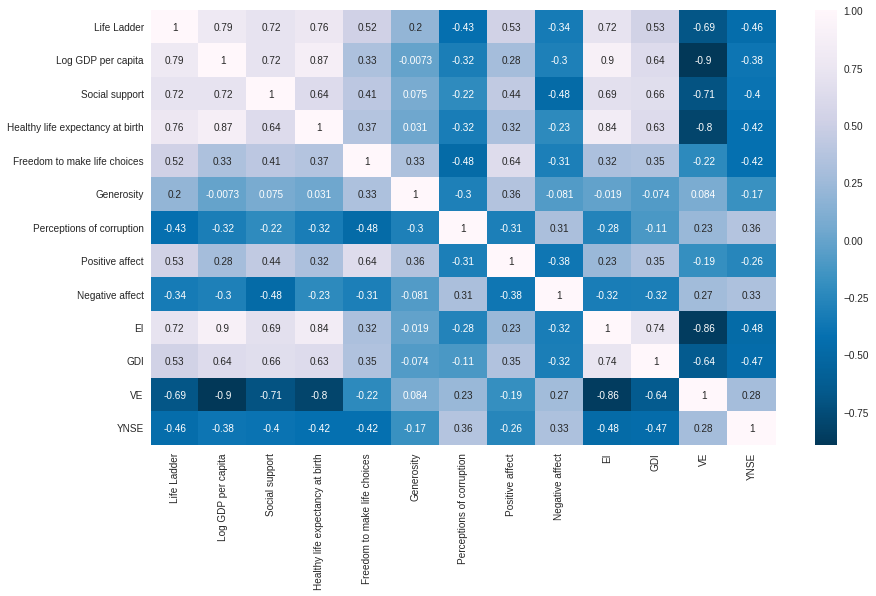

In [89]:
plt.figure(figsize=(14,8))
corr = df5.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="PuBu_r")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5fc5cc1f50>]],
      dtype=object)

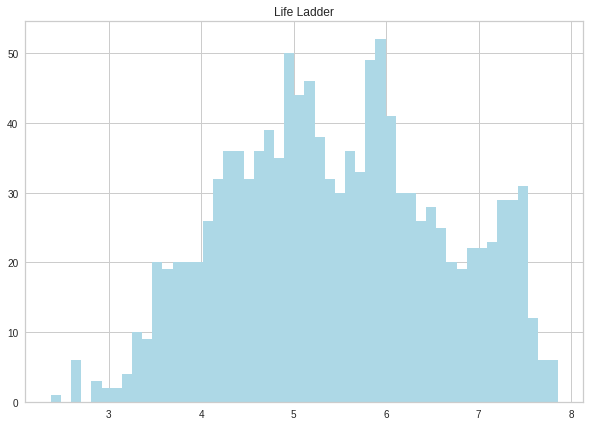

In [90]:
df5.hist(column='Life Ladder', bins=50, figsize=(10,7), color=['lightblue'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5fc7a47d90>]],
      dtype=object)

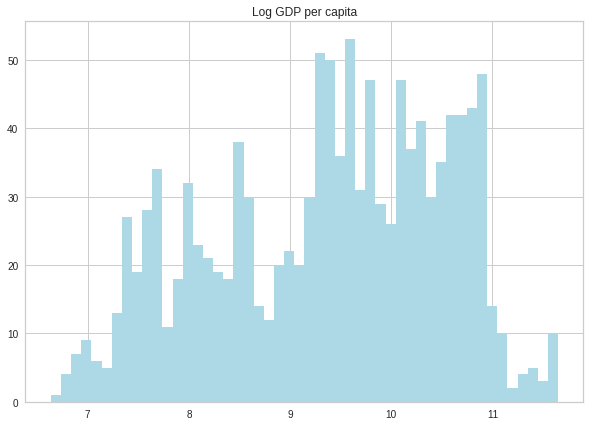

In [91]:
df5.hist(column='Log GDP per capita', bins=50, figsize=(10,7), color=['lightblue'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5fcfe372d0>]],
      dtype=object)

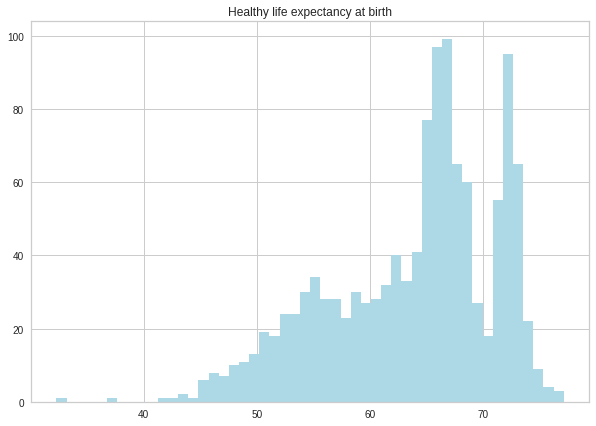

In [92]:
df5.hist(column='Healthy life expectancy at birth', bins=50, figsize=(10,7), color=['lightblue'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5fc5a46a10>]],
      dtype=object)

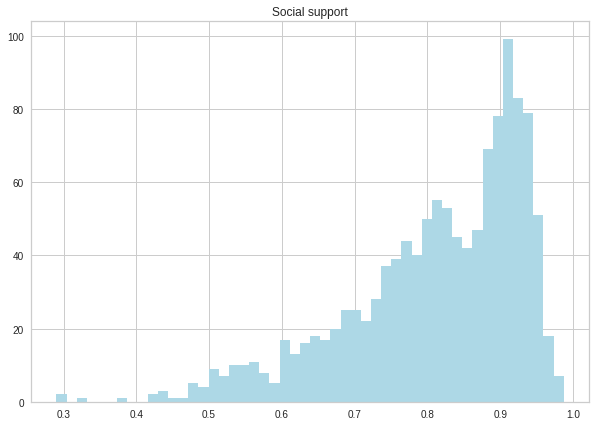

In [93]:
df5.hist(column='Social support', bins=50, figsize=(10,7), color=['lightblue'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5fc5950890>]],
      dtype=object)

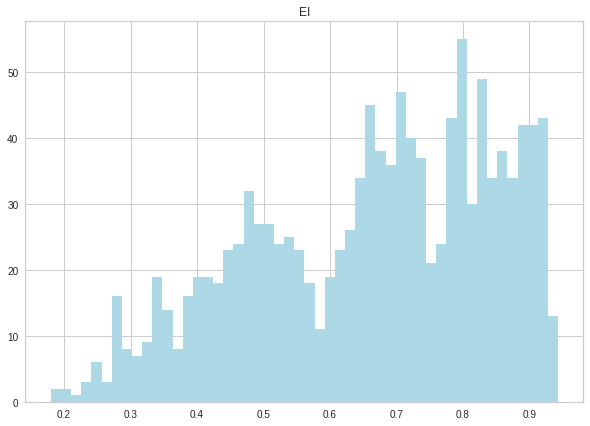

In [94]:
df5.hist(column='EI', bins=50, figsize=(10,7), color=['lightblue'])

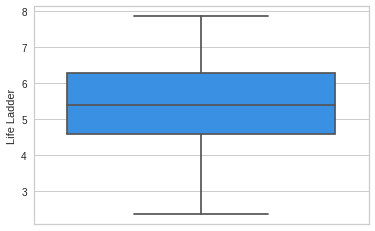

In [95]:
sns.boxplot(data=df5, y='Life Ladder',color = "dodgerblue" )

---

---
#### 5. MODELOS


5.1. Modelos *df1*: variáveis *WHR* para a explicação do *Life Ladder*

5.1.1. *Setup* e comparativo de modelos do *df1*


In [96]:
df1_models = setup (data = df1, target ='Life Ladder', session_id=123, normalize = True, silent = True)

,Description,Value
0,session_id,123
1,Target,Life Ladder
2,Original Data,"(1708, 9)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1195, 8)"


In [97]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2911,0.1474,0.3830,0.8866,0.0662,0.0593,0.544
rf,Random Forest Regressor,0.3166,0.1738,0.4154,0.8663,0.0709,0.0641,1.028
lightgbm,Light Gradient Boosting Machine,0.3228,0.1801,0.4229,0.8614,0.0723,0.0653,0.147
knn,K Neighbors Regressor,0.3263,0.1864,0.4308,0.8564,0.0733,0.0658,0.083
gbr,Gradient Boosting Regressor,0.3512,0.2107,0.4574,0.8384,0.0777,0.0709,0.226
ada,AdaBoost Regressor,0.4112,0.2597,0.5080,0.8006,0.0850,0.0814,0.157
lar,Least Angle Regression,0.4294,0.3114,0.5565,0.7616,0.0948,0.0870,0.041
br,Bayesian Ridge,0.4296,0.3114,0.5565,0.7616,0.0948,0.0870,0.032
ridge,Ridge Regression,0.4294,0.3114,0.5565,0.7616,0.0948,0.0870,0.031
lr,Linear Regression,0.4294,0.3114,0.5565,0.7616,0.0948,0.0870,0.688


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

5.1.2. Modelos individuais do *df1*

a) *Extra Trees Regressor*  - *df1*

In [98]:
et1 = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2976,0.1593,0.3991,0.8854,0.0722,0.0641
1,0.3065,0.1597,0.3996,0.8898,0.0698,0.0631
2,0.2669,0.1232,0.3510,0.9199,0.0617,0.0548
3,0.2929,0.1407,0.3750,0.8914,0.0644,0.0603
4,0.2719,0.1331,0.3648,0.9092,0.0636,0.0557
5,0.2827,0.1375,0.3708,0.8884,0.0631,0.0560
6,0.2748,0.1272,0.3566,0.8917,0.0607,0.0561
7,0.2751,0.1393,0.3732,0.8834,0.0629,0.0535
8,0.3019,0.1504,0.3878,0.8789,0.0639,0.0583


b) *Random Forest Regressor* - *df1*

In [99]:
rf1 = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3154,0.1787,0.4227,0.8715,0.0743,0.0667
1,0.3322,0.1893,0.4351,0.8694,0.0744,0.0675
2,0.2836,0.1402,0.3745,0.9088,0.0644,0.0577
3,0.3347,0.1965,0.4433,0.8482,0.0770,0.0699
4,0.3073,0.1627,0.4034,0.8889,0.0697,0.0624
5,0.3090,0.1606,0.4008,0.8696,0.0680,0.0613
6,0.3046,0.1385,0.3722,0.8820,0.0631,0.0613
7,0.2998,0.1687,0.4107,0.8588,0.0686,0.0583
8,0.3047,0.1556,0.3945,0.8747,0.0644,0.0581


c) *Light Gradient Boosting Machine* - *df1*

In [100]:
lightgbm1 = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3134,0.1817,0.4262,0.8693,0.0757,0.0676
1,0.3390,0.1868,0.4322,0.8711,0.0744,0.0692
2,0.2998,0.1489,0.3859,0.9032,0.0658,0.0606
3,0.3335,0.1974,0.4443,0.8475,0.0776,0.0697
4,0.3048,0.1711,0.4136,0.8832,0.0709,0.0614
5,0.3129,0.1599,0.3999,0.8702,0.0675,0.0612
6,0.2889,0.1307,0.3615,0.8887,0.0613,0.0580
7,0.3325,0.1953,0.4419,0.8365,0.0739,0.0648
8,0.3201,0.1797,0.4239,0.8553,0.0696,0.0612


5.1.3. Combinações dos modelos do *df1*

a) *Blend* - *df1*

In [101]:
blend2_1 = blend_models(estimator_list = [et1,rf1])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3006,0.1630,0.4037,0.8828,0.0722,0.0643
1,0.3181,0.1701,0.4125,0.8826,0.0713,0.0651
2,0.2718,0.1282,0.3580,0.9167,0.0623,0.0556
3,0.3114,0.1617,0.4021,0.8751,0.0697,0.0646
4,0.2837,0.1413,0.3758,0.9036,0.0654,0.0580
5,0.2935,0.1457,0.3816,0.8818,0.0649,0.0583
6,0.2841,0.1271,0.3565,0.8918,0.0608,0.0577
7,0.2833,0.1498,0.3871,0.8746,0.0650,0.0552
8,0.2992,0.1490,0.3860,0.8800,0.0633,0.0575


In [102]:
blend3_1 = blend_models(estimator_list = [et1,rf1,lightgbm1])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2982,0.1639,0.4048,0.8821,0.0724,0.0641
1,0.3210,0.1715,0.4141,0.8817,0.0715,0.0656
2,0.2762,0.1293,0.3596,0.9160,0.0621,0.0565
3,0.3125,0.1666,0.4082,0.8713,0.0711,0.0652
4,0.2874,0.1470,0.3834,0.8997,0.0664,0.0584
5,0.2949,0.1452,0.3811,0.8821,0.0647,0.0584
6,0.2823,0.1242,0.3524,0.8942,0.0601,0.0572
7,0.2955,0.1598,0.3998,0.8662,0.0671,0.0576
8,0.3020,0.1546,0.3932,0.8755,0.0644,0.0579


b) *Stack* - *df1*

In [103]:
stacked_models2_1 = stack_models(estimator_list=[et1,rf1])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2967,0.1547,0.3933,0.8887,0.0713,0.0639
1,0.3033,0.1538,0.3921,0.8939,0.0688,0.0626
2,0.2668,0.1222,0.3496,0.9205,0.0620,0.0550
3,0.2929,0.1413,0.3759,0.8909,0.0644,0.0602
4,0.2705,0.1323,0.3638,0.9097,0.0627,0.0547
5,0.2780,0.1402,0.3744,0.8862,0.0639,0.0551
6,0.2721,0.1331,0.3649,0.8866,0.0621,0.0555
7,0.2716,0.1366,0.3696,0.8856,0.0623,0.0527
8,0.3010,0.1512,0.3888,0.8782,0.0641,0.0582


In [104]:
stacked_models3_1 = stack_models(estimator_list=[et1,rf1,lightgbm1])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2967,0.1550,0.3937,0.8885,0.0714,0.0640
1,0.3024,0.1542,0.3927,0.8936,0.0689,0.0624
2,0.2665,0.1217,0.3489,0.9209,0.0618,0.0549
3,0.2927,0.1412,0.3757,0.8910,0.0644,0.0602
4,0.2707,0.1334,0.3652,0.9090,0.0629,0.0547
5,0.2777,0.1400,0.3742,0.8863,0.0638,0.0550
6,0.2719,0.1330,0.3647,0.8867,0.0621,0.0555
7,0.2729,0.1375,0.3708,0.8849,0.0625,0.0530
8,0.3006,0.1509,0.3884,0.8785,0.0641,0.0581


---
5.2. Modelos *df2*: variáveis *WHR* (sem "*Negative affect*") para a explicação do *Life Ladder*

5.2.1. *Setup* e comparativo de modelos do *df2*


In [105]:
df2_models = setup (data = df2, target ='Life Ladder', session_id=123, normalize = True, silent = True)

,Description,Value
0,session_id,123
1,Target,Life Ladder
2,Original Data,"(1708, 8)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1195, 7)"


In [106]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2939,0.1506,0.3869,0.8842,0.0668,0.0599,0.530
rf,Random Forest Regressor,0.3196,0.1779,0.4203,0.8632,0.0720,0.0649,0.730
lightgbm,Light Gradient Boosting Machine,0.3322,0.1908,0.4350,0.8531,0.0745,0.0671,0.097
knn,K Neighbors Regressor,0.3439,0.2047,0.4512,0.8421,0.0768,0.0694,0.062
gbr,Gradient Boosting Regressor,0.3525,0.2100,0.4567,0.8387,0.0776,0.0711,0.206
ada,AdaBoost Regressor,0.4161,0.2676,0.5156,0.7950,0.0861,0.0822,0.146
lar,Least Angle Regression,0.4298,0.3114,0.5564,0.7616,0.0947,0.0870,0.016
br,Bayesian Ridge,0.4298,0.3114,0.5564,0.7616,0.0947,0.0870,0.015
ridge,Ridge Regression,0.4298,0.3114,0.5564,0.7616,0.0947,0.0870,0.015
lr,Linear Regression,0.4298,0.3114,0.5564,0.7616,0.0947,0.0870,0.015


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

5.2.2. Modelos individuais do *df2*


a) *Extra Trees Regressor*  - *df2*

In [107]:
et2 = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2963,0.1561,0.3951,0.8877,0.0713,0.0635
1,0.3197,0.1705,0.4129,0.8823,0.0722,0.0659
2,0.2624,0.1242,0.3524,0.9193,0.0623,0.0543
3,0.2909,0.1411,0.3757,0.8910,0.0648,0.0603
4,0.2828,0.1407,0.3751,0.9040,0.0652,0.0577
5,0.2886,0.1394,0.3733,0.8869,0.0629,0.0568
6,0.2787,0.1278,0.3575,0.8911,0.0605,0.0565
7,0.2772,0.1463,0.3826,0.8775,0.0647,0.0541
8,0.2943,0.1494,0.3865,0.8797,0.0634,0.0564


b) *Random Forest Regressor* - *df2*

In [108]:
rf2 = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3175,0.1794,0.4235,0.8710,0.0749,0.0673
1,0.3399,0.1948,0.4414,0.8656,0.0757,0.0694
2,0.2845,0.1421,0.3769,0.9076,0.0651,0.0580
3,0.3285,0.1900,0.4359,0.8533,0.0756,0.0685
4,0.3219,0.1751,0.4185,0.8805,0.0724,0.0655
5,0.3072,0.1645,0.4056,0.8664,0.0690,0.0608
6,0.3079,0.1396,0.3736,0.8811,0.0633,0.0621
7,0.3018,0.1742,0.4174,0.8542,0.0700,0.0587
8,0.3119,0.1657,0.4070,0.8666,0.0669,0.0599


c) *Light Gradient Boosting Machine* - *df2*

In [109]:
lightgbm2 = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2992,0.1668,0.4084,0.8800,0.0734,0.0643
1,0.3568,0.2044,0.4522,0.8589,0.0784,0.0730
2,0.3038,0.1577,0.3971,0.8975,0.0684,0.0616
3,0.3495,0.2240,0.4733,0.8270,0.0828,0.0731
4,0.3233,0.1836,0.4285,0.8747,0.0737,0.0656
5,0.3282,0.1776,0.4215,0.8558,0.0702,0.0638
6,0.2964,0.1355,0.3681,0.8846,0.0617,0.0589
7,0.3268,0.1938,0.4402,0.8378,0.0737,0.0637
8,0.3358,0.1952,0.4419,0.8427,0.0725,0.0641


5.2.3. Combinações dos modelos do *df2*


a) *Blend*  - *df2*

In [110]:
blend2_2 = blend_models(estimator_list = [et2,rf2])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3009,0.1612,0.4015,0.8840,0.0720,0.0643
1,0.3282,0.1787,0.4227,0.8767,0.0732,0.0673
2,0.2673,0.1278,0.3574,0.9169,0.0626,0.0548
3,0.3074,0.1594,0.3993,0.8769,0.0692,0.0639
4,0.2959,0.1514,0.3891,0.8967,0.0676,0.0604
5,0.2963,0.1493,0.3864,0.8788,0.0655,0.0586
6,0.2894,0.1278,0.3575,0.8912,0.0608,0.0586
7,0.2840,0.1567,0.3958,0.8689,0.0668,0.0554
8,0.2994,0.1542,0.3927,0.8758,0.0645,0.0575


In [111]:
blend3_2 = blend_models(estimator_list = [et2,rf2,lightgbm2])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2949,0.1590,0.3987,0.8857,0.0717,0.0632
1,0.3331,0.1823,0.4270,0.8742,0.0740,0.0683
2,0.2760,0.1314,0.3625,0.9146,0.0630,0.0564
3,0.3162,0.1724,0.4152,0.8669,0.0725,0.0660
4,0.3022,0.1579,0.3973,0.8923,0.0688,0.0615
5,0.3011,0.1528,0.3909,0.8760,0.0659,0.0592
6,0.2872,0.1262,0.3552,0.8925,0.0601,0.0579
7,0.2937,0.1630,0.4038,0.8635,0.0681,0.0573
8,0.3069,0.1628,0.4034,0.8689,0.0661,0.0588


b) *Stack* - *df2*

In [112]:
stacked_models2_2 = stack_models(estimator_list=[et2,rf2])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2955,0.1529,0.3910,0.8900,0.0706,0.0632
1,0.3175,0.1682,0.4101,0.8839,0.0720,0.0656
2,0.2618,0.1254,0.3541,0.9185,0.0630,0.0543
3,0.2866,0.1405,0.3749,0.8915,0.0645,0.0592
4,0.2794,0.1381,0.3716,0.9058,0.0642,0.0566
5,0.2859,0.1384,0.3720,0.8877,0.0625,0.0559
6,0.2770,0.1315,0.3626,0.8880,0.0614,0.0561
7,0.2751,0.1436,0.3789,0.8798,0.0641,0.0536
8,0.2926,0.1496,0.3868,0.8795,0.0633,0.0559


In [113]:
stacked_models3_2 = stack_models(estimator_list=[et2,rf2,lightgbm2])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2963,0.1535,0.3918,0.8896,0.0707,0.0632
1,0.3156,0.1684,0.4104,0.8838,0.0720,0.0652
2,0.2621,0.1259,0.3548,0.9182,0.0631,0.0543
3,0.2870,0.1412,0.3758,0.8910,0.0647,0.0594
4,0.2794,0.1383,0.3719,0.9056,0.0643,0.0566
5,0.2863,0.1383,0.3719,0.8877,0.0624,0.0560
6,0.2767,0.1313,0.3624,0.8881,0.0613,0.0560
7,0.2754,0.1438,0.3792,0.8796,0.0642,0.0537
8,0.2917,0.1491,0.3861,0.8799,0.0632,0.0558


---
5.3. Modelos *df3*: variáveis *WHR* (sem "*Negative affect*" e "*Positive Affect*") para a explicação do *Life Ladder*

5.3.1. *Setup* e comparativo de modelos do *df3*

In [114]:
df3_models = setup (data = df3, target ='Life Ladder', session_id=123, normalize = True, silent = True)

,Description,Value
0,session_id,123
1,Target,Life Ladder
2,Original Data,"(1708, 7)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1195, 6)"


In [115]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3147,0.1694,0.4100,0.8695,0.0702,0.0637,0.511
rf,Random Forest Regressor,0.3433,0.2040,0.4505,0.8430,0.0761,0.0690,0.724
lightgbm,Light Gradient Boosting Machine,0.3512,0.2082,0.4551,0.8402,0.0768,0.0703,0.092
knn,K Neighbors Regressor,0.3600,0.2224,0.4701,0.8287,0.0795,0.0725,0.063
gbr,Gradient Boosting Regressor,0.3776,0.2360,0.4838,0.8188,0.0809,0.0754,0.185
ada,AdaBoost Regressor,0.4266,0.2808,0.5286,0.7844,0.0875,0.0840,0.142
ridge,Ridge Regression,0.4462,0.3329,0.5753,0.7453,0.0971,0.0897,0.015
br,Bayesian Ridge,0.4463,0.3329,0.5753,0.7453,0.0971,0.0897,0.017
lar,Least Angle Regression,0.4462,0.3330,0.5753,0.7452,0.0971,0.0897,0.016
lr,Linear Regression,0.4462,0.3330,0.5753,0.7452,0.0971,0.0897,0.015


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

5.3.2. Modelos individuais do *df3*


a) *Extra Trees Regressor* - *df3*

In [116]:
et3 = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3163,0.1682,0.4101,0.8790,0.0748,0.0679
1,0.3431,0.2065,0.4545,0.8575,0.0784,0.0708
2,0.2953,0.1432,0.3784,0.9069,0.0642,0.0592
3,0.2981,0.1488,0.3857,0.8851,0.0673,0.0619
4,0.2824,0.1459,0.3820,0.9004,0.0665,0.0579
5,0.3003,0.1466,0.3829,0.8810,0.0640,0.0589
6,0.3032,0.1572,0.3965,0.8661,0.0661,0.0612
7,0.3126,0.1735,0.4165,0.8548,0.0693,0.0599
8,0.3158,0.1570,0.3962,0.8736,0.0652,0.0607


b) *Random Forest Regressor* - *df3*

In [117]:
rf3 = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3386,0.2030,0.4506,0.8539,0.0793,0.0715
1,0.3707,0.2294,0.4789,0.8417,0.0812,0.0752
2,0.3256,0.1787,0.4227,0.8838,0.0710,0.0653
3,0.3373,0.2092,0.4574,0.8384,0.0794,0.0702
4,0.3222,0.1786,0.4226,0.8781,0.0727,0.0653
5,0.3334,0.1837,0.4286,0.8509,0.0716,0.0651
6,0.3282,0.1752,0.4186,0.8508,0.0682,0.0651
7,0.3390,0.2118,0.4603,0.8227,0.0758,0.0652
8,0.3413,0.1888,0.4345,0.8479,0.0709,0.0655


c) *Light Gradient Boosting Machine* - *df3*

In [118]:
lightgbm3 = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3326,0.1859,0.4312,0.8663,0.0765,0.0704
1,0.3863,0.2432,0.4931,0.8322,0.0842,0.0786
2,0.3521,0.2087,0.4569,0.8643,0.0752,0.0697
3,0.3552,0.2095,0.4577,0.8382,0.0786,0.0731
4,0.3269,0.1811,0.4255,0.8764,0.0730,0.0660
5,0.3401,0.1894,0.4352,0.8462,0.0711,0.0652
6,0.3140,0.1638,0.4047,0.8605,0.0665,0.0619
7,0.3369,0.2168,0.4656,0.8185,0.0771,0.0649
8,0.3487,0.2054,0.4533,0.8345,0.0743,0.0669


5.3.3. Combinações dos modelos do *df3*


a) *Blend* - *df3*

In [119]:
blend2_3 = blend_models(estimator_list = [et3,rf3])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3220,0.1783,0.4223,0.8717,0.0759,0.0687
1,0.3541,0.2138,0.4624,0.8525,0.0791,0.0725
2,0.3078,0.1564,0.3954,0.8984,0.0668,0.0618
3,0.3158,0.1705,0.4130,0.8683,0.0721,0.0657
4,0.2971,0.1567,0.3958,0.8931,0.0686,0.0606
5,0.3132,0.1606,0.4008,0.8696,0.0669,0.0613
6,0.3122,0.1608,0.4010,0.8631,0.0662,0.0625
7,0.3217,0.1881,0.4337,0.8425,0.0718,0.0618
8,0.3254,0.1692,0.4113,0.8637,0.0675,0.0626


In [120]:
blend3_3 = blend_models(estimator_list = [et3,rf3,lightgbm3])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3182,0.1764,0.4200,0.8731,0.0754,0.0680
1,0.3608,0.2183,0.4672,0.8494,0.0799,0.0738
2,0.3188,0.1671,0.4088,0.8914,0.0683,0.0637
3,0.3224,0.1772,0.4210,0.8631,0.0732,0.0667
4,0.3010,0.1595,0.3994,0.8911,0.0691,0.0612
5,0.3175,0.1641,0.4051,0.8668,0.0672,0.0617
6,0.3060,0.1570,0.3962,0.8663,0.0653,0.0611
7,0.3221,0.1916,0.4377,0.8396,0.0725,0.0621
8,0.3291,0.1763,0.4199,0.8580,0.0688,0.0631


b) *Stack* - *df3*


In [121]:
stacked_models2_3 = stack_models(estimator_list=[et3,rf3])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3147,0.1664,0.4079,0.8803,0.0748,0.0677
1,0.3444,0.2060,0.4539,0.8578,0.0787,0.0714
2,0.2909,0.1392,0.3731,0.9095,0.0636,0.0582
3,0.2908,0.1435,0.3789,0.8891,0.0657,0.0600
4,0.2853,0.1481,0.3849,0.8989,0.0669,0.0584
5,0.2947,0.1421,0.3769,0.8847,0.0630,0.0578
6,0.3025,0.1620,0.4025,0.8620,0.0673,0.0612
7,0.3113,0.1699,0.4122,0.8578,0.0687,0.0595
8,0.3099,0.1551,0.3938,0.8751,0.0650,0.0596


In [122]:
stacked_models3_3 = stack_models(estimator_list=[et3,rf3,lightgbm3])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3149,0.1664,0.4080,0.8803,0.0748,0.0678
1,0.3462,0.2067,0.4547,0.8574,0.0789,0.0718
2,0.2927,0.1406,0.3749,0.9086,0.0637,0.0585
3,0.2912,0.1448,0.3805,0.8882,0.0659,0.0600
4,0.2865,0.1484,0.3852,0.8987,0.0670,0.0587
5,0.2954,0.1437,0.3791,0.8833,0.0630,0.0577
6,0.3006,0.1596,0.3995,0.8641,0.0668,0.0608
7,0.3103,0.1694,0.4116,0.8582,0.0687,0.0594
8,0.3105,0.1558,0.3947,0.8745,0.0651,0.0597


---
5.4. Modelos *df4*: indicadores adicionais (*EI*, *GDI*, *VE* e *YNSE*) para a explicação do *Life Ladder*


5.4.1. *Setup* e comparativo de modelos do *df4*

In [123]:
df4_models = setup (data = df4, target ='Life Ladder', session_id=123, normalize = True, silent = True)

,Description,Value
0,session_id,123
1,Target,Life Ladder
2,Original Data,"(1217, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(851, 4)"


In [124]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3037,0.1774,0.4193,0.8631,0.0735,0.0626,0.450
rf,Random Forest Regressor,0.3247,0.1972,0.4427,0.8468,0.0765,0.0663,0.547
knn,K Neighbors Regressor,0.3427,0.2208,0.4686,0.8294,0.0813,0.0703,0.063
lightgbm,Light Gradient Boosting Machine,0.3465,0.2220,0.4705,0.8277,0.0808,0.0704,0.065
gbr,Gradient Boosting Regressor,0.4227,0.3011,0.5481,0.7672,0.0915,0.0843,0.105
dt,Decision Tree Regressor,0.3999,0.3189,0.5600,0.7496,0.0951,0.0806,0.018
ada,AdaBoost Regressor,0.5014,0.3858,0.6194,0.7026,0.1013,0.0975,0.117
br,Bayesian Ridge,0.6294,0.5788,0.7585,0.5539,0.1236,0.1235,0.015
ridge,Ridge Regression,0.6294,0.5789,0.7585,0.5538,0.1236,0.1236,0.015
lr,Linear Regression,0.6295,0.5789,0.7586,0.5537,0.1236,0.1236,0.016


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

5.4.2. Modelos individuais do *df4*


a) *Extra Trees Regressor* - *df4*


In [125]:
et4 = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3084,0.1665,0.4081,0.8610,0.0650,0.0578
1,0.3393,0.2302,0.4798,0.8190,0.0868,0.0733
2,0.2757,0.1372,0.3703,0.8914,0.0634,0.0551
3,0.3262,0.1868,0.4323,0.8448,0.0767,0.0678
4,0.2913,0.1641,0.4051,0.8769,0.0709,0.0582
5,0.2550,0.1220,0.3493,0.9022,0.0558,0.0477
6,0.2810,0.1589,0.3986,0.8920,0.0737,0.0600
7,0.3105,0.1788,0.4229,0.8647,0.0764,0.0673
8,0.3170,0.2154,0.4641,0.8014,0.0861,0.0687


b) *Random Forest Regressor* - *df4*

In [126]:
rf4 = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3252,0.1905,0.4365,0.8410,0.0702,0.0617
1,0.3502,0.2524,0.5024,0.8015,0.0890,0.0742
2,0.3079,0.1682,0.4102,0.8668,0.0694,0.0611
3,0.3353,0.2028,0.4503,0.8316,0.0785,0.0688
4,0.3037,0.1798,0.4240,0.8652,0.0737,0.0608
5,0.2965,0.1654,0.4067,0.8674,0.0649,0.0549
6,0.2848,0.1509,0.3885,0.8974,0.0716,0.0618
7,0.3473,0.2082,0.4563,0.8424,0.0799,0.0734
8,0.3400,0.2428,0.4928,0.7761,0.0883,0.0723


c) *K Neighbors Regressor* - *df4*

In [127]:
knn4 = create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3660,0.2507,0.5007,0.7907,0.0807,0.0687
1,0.3758,0.2894,0.5379,0.7725,0.0951,0.0807
2,0.3203,0.1911,0.4371,0.8488,0.0728,0.0627
3,0.3481,0.2327,0.4824,0.8067,0.0859,0.0727
4,0.3477,0.2343,0.4840,0.8243,0.0848,0.0699
5,0.3087,0.1713,0.4138,0.8627,0.0667,0.0583
6,0.3237,0.1864,0.4317,0.8734,0.0784,0.0698
7,0.3366,0.2011,0.4485,0.8478,0.0783,0.0716
8,0.3325,0.2114,0.4598,0.8051,0.0841,0.0706


5.4.3. Combinações dos modelos do *df4*


a) *Blend* - *df4*

In [128]:
blend2_4 = blend_models(estimator_list = [et4,rf4])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3123,0.1738,0.4169,0.8549,0.0667,0.0589
1,0.3411,0.2370,0.4868,0.8137,0.0872,0.0731
2,0.2879,0.1487,0.3856,0.8823,0.0656,0.0574
3,0.3244,0.1893,0.4351,0.8427,0.0767,0.0671
4,0.2897,0.1663,0.4078,0.8753,0.0712,0.0580
5,0.2698,0.1343,0.3665,0.8923,0.0584,0.0502
6,0.2736,0.1473,0.3838,0.8999,0.0711,0.0591
7,0.3257,0.1872,0.4326,0.8584,0.0769,0.0697
8,0.3244,0.2228,0.4720,0.7946,0.0863,0.0698


In [129]:
blend3_4 = blend_models(estimator_list = [et4,rf4,knn4])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3243,0.1906,0.4366,0.8408,0.0700,0.0611
1,0.3468,0.2439,0.4938,0.8083,0.0885,0.0745
2,0.2902,0.1555,0.3943,0.8769,0.0667,0.0576
3,0.3237,0.1908,0.4368,0.8415,0.0776,0.0673
4,0.2938,0.1750,0.4183,0.8688,0.0734,0.0590
5,0.2719,0.1326,0.3641,0.8937,0.0583,0.0507
6,0.2773,0.1480,0.3848,0.8994,0.0711,0.0600
7,0.3169,0.1811,0.4256,0.8629,0.0753,0.0675
8,0.3141,0.2008,0.4481,0.8149,0.0827,0.0676


b) *Stack* - *df4*

In [130]:
stacked_models2_4 = stack_models(estimator_list=[et4,rf4])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3096,0.1668,0.4084,0.8608,0.0650,0.0579
1,0.3419,0.2318,0.4815,0.8178,0.0873,0.0740
2,0.2763,0.1363,0.3692,0.8921,0.0631,0.0551
3,0.3268,0.1867,0.4321,0.8449,0.0767,0.0677
4,0.2921,0.1694,0.4115,0.8730,0.0722,0.0584
5,0.2577,0.1239,0.3520,0.9006,0.0561,0.0479
6,0.2811,0.1602,0.4002,0.8912,0.0743,0.0598
7,0.3090,0.1819,0.4265,0.8623,0.0775,0.0670
8,0.3200,0.2183,0.4672,0.7988,0.0865,0.0691


In [131]:
stacked_models3_4 = stack_models(estimator_list=[et4,rf4,knn4])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3168,0.1764,0.4200,0.8527,0.0670,0.0593
1,0.3452,0.2361,0.4859,0.8144,0.0881,0.0749
2,0.2786,0.1379,0.3713,0.8909,0.0631,0.0553
3,0.3223,0.1848,0.4299,0.8465,0.0767,0.0670
4,0.2884,0.1728,0.4157,0.8704,0.0731,0.0577
5,0.2549,0.1236,0.3516,0.9009,0.0562,0.0474
6,0.2765,0.1597,0.3997,0.8915,0.0740,0.0591
7,0.3007,0.1721,0.4148,0.8697,0.0749,0.0652
8,0.3120,0.2057,0.4536,0.8103,0.0844,0.0675


---
5.5. Modelos *df5*: variáveis *WHR* e indicadores adicionais (*EI*, *GDI*, *VE* e *YNSE*) para a explicação do *Life Ladder*

5.5.1. *Setup* e comparativo de modelos do *df5*

In [132]:
df5_models = setup (data = df5, target ='Life Ladder', session_id=123, normalize = True, silent = True)

,Description,Value
0,session_id,123
1,Target,Life Ladder
2,Original Data,"(1217, 13)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(851, 12)"


In [133]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2680,0.1363,0.3668,0.8951,0.0648,0.0556,0.517
lightgbm,Light Gradient Boosting Machine,0.2920,0.1595,0.3971,0.8767,0.0694,0.0598,0.122
rf,Random Forest Regressor,0.2925,0.1608,0.3991,0.8762,0.0702,0.0605,0.759
knn,K Neighbors Regressor,0.3173,0.1852,0.4279,0.8566,0.0747,0.0656,0.065
gbr,Gradient Boosting Regressor,0.3248,0.1895,0.4336,0.8540,0.0745,0.0658,0.221
ada,AdaBoost Regressor,0.4026,0.2594,0.5078,0.8008,0.0855,0.0801,0.153
br,Bayesian Ridge,0.4214,0.3084,0.5525,0.7639,0.0936,0.0849,0.015
ridge,Ridge Regression,0.4216,0.3087,0.5528,0.7637,0.0936,0.0849,0.016
lar,Least Angle Regression,0.4216,0.3087,0.5528,0.7636,0.0936,0.0849,0.018
lr,Linear Regression,0.4216,0.3087,0.5528,0.7636,0.0936,0.0849,0.015


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

5.5.2. Modelos individuais do *df5*

a) *Extra Trees Regressor* - *df5*


In [134]:
et5 = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2669,0.1288,0.3589,0.8925,0.0583,0.0505
1,0.3158,0.1923,0.4385,0.8488,0.0791,0.0676
2,0.2294,0.0909,0.3015,0.9280,0.0546,0.0473
3,0.2716,0.1376,0.3709,0.8857,0.0648,0.0552
4,0.2950,0.1713,0.4138,0.8715,0.0735,0.0599
5,0.2062,0.0855,0.2924,0.9314,0.0479,0.0400
6,0.2633,0.1384,0.3721,0.9059,0.0683,0.0575
7,0.2635,0.1248,0.3532,0.9056,0.0644,0.0565
8,0.2772,0.1440,0.3795,0.8672,0.0671,0.0582


b) *Light Gradient Boosting Machine* - *df5*

In [135]:
lightgbm5 = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2885,0.1520,0.3899,0.8731,0.0629,0.0544
1,0.3404,0.2108,0.4591,0.8343,0.0816,0.0719
2,0.2805,0.1355,0.3681,0.8928,0.0658,0.0569
3,0.2944,0.1550,0.3937,0.8713,0.0679,0.0584
4,0.3227,0.2100,0.4583,0.8425,0.0816,0.0647
5,0.2186,0.0923,0.3039,0.9260,0.0497,0.0424
6,0.2884,0.1668,0.4084,0.8866,0.0744,0.0624
7,0.2933,0.1543,0.3928,0.8832,0.0692,0.0618
8,0.2948,0.1731,0.4161,0.8404,0.0724,0.0607


c) *Random Forest Regressor* - *df5*

In [136]:
rf5 = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3021,0.1607,0.4009,0.8658,0.0644,0.0566
1,0.3285,0.2060,0.4539,0.8380,0.0819,0.0697
2,0.2680,0.1265,0.3556,0.8999,0.0634,0.0550
3,0.3089,0.1702,0.4126,0.8586,0.0723,0.0628
4,0.3087,0.1842,0.4292,0.8618,0.0761,0.0622
5,0.2257,0.1026,0.3204,0.9177,0.0525,0.0438
6,0.3008,0.2046,0.4524,0.8610,0.0831,0.0673
7,0.2967,0.1432,0.3784,0.8916,0.0668,0.0623
8,0.2927,0.1580,0.3975,0.8543,0.0697,0.0605


5.5.3. Combinações dos modelos do *df5*



a) *Blend* - *df5*

In [137]:
blend2_5 = blend_models(estimator_list = [et5,lightgbm5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2686,0.1335,0.3653,0.8886,0.0591,0.0507
1,0.3143,0.1948,0.4414,0.8468,0.0792,0.0669
2,0.2471,0.1060,0.3256,0.9161,0.0588,0.0507
3,0.2766,0.1402,0.3744,0.8836,0.0650,0.0555
4,0.3021,0.1841,0.4291,0.8619,0.0762,0.0610
5,0.2025,0.0823,0.2868,0.9340,0.0470,0.0393
6,0.2682,0.1460,0.3821,0.9008,0.0701,0.0585
7,0.2728,0.1314,0.3625,0.9005,0.0650,0.0581
8,0.2786,0.1509,0.3884,0.8609,0.0682,0.0580


In [138]:
blend3_5 = blend_models(estimator_list = [et5,lightgbm5,rf5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2763,0.1389,0.3727,0.8840,0.0602,0.0520
1,0.3160,0.1931,0.4395,0.8481,0.0792,0.0674
2,0.2510,0.1098,0.3314,0.9131,0.0597,0.0515
3,0.2839,0.1473,0.3838,0.8777,0.0670,0.0573
4,0.3010,0.1812,0.4256,0.8641,0.0757,0.0608
5,0.2079,0.0868,0.2946,0.9304,0.0482,0.0404
6,0.2766,0.1608,0.4010,0.8907,0.0739,0.0609
7,0.2763,0.1327,0.3643,0.8995,0.0650,0.0586
8,0.2790,0.1493,0.3864,0.8624,0.0678,0.0579


b) *Stack* - *df5*


In [139]:
stacked_models2_5 = stack_models(estimator_list=[et5,lightgbm5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2810,0.1376,0.3710,0.8851,0.0613,0.0536
1,0.3021,0.1804,0.4247,0.8582,0.0765,0.0645
2,0.2155,0.0822,0.2867,0.9350,0.0522,0.0445
3,0.2602,0.1300,0.3605,0.8920,0.0621,0.0520
4,0.2963,0.1824,0.4271,0.8632,0.0758,0.0599
5,0.2062,0.0865,0.2941,0.9307,0.0482,0.0398
6,0.2706,0.1369,0.3700,0.9070,0.0671,0.0580
7,0.2547,0.1242,0.3524,0.9060,0.0656,0.0550
8,0.2705,0.1402,0.3744,0.8708,0.0657,0.0561


In [140]:
stacked_models3_5 = stack_models(estimator_list=[et5,lightgbm5,rf5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2772,0.1356,0.3682,0.8868,0.0607,0.0528
1,0.3053,0.1842,0.4292,0.8551,0.0770,0.0652
2,0.2164,0.0823,0.2869,0.9349,0.0523,0.0447
3,0.2597,0.1289,0.3590,0.8929,0.0617,0.0519
4,0.2966,0.1828,0.4275,0.8629,0.0758,0.0599
5,0.2049,0.0854,0.2922,0.9316,0.0478,0.0395
6,0.2679,0.1349,0.3672,0.9084,0.0665,0.0573
7,0.2547,0.1251,0.3537,0.9053,0.0661,0.0551
8,0.2750,0.1437,0.3790,0.8676,0.0665,0.0573


---
5.6. Modelos *df6*: variáveis *WHR*  (sem "*Negative affect*") e indicadores adicionais (*EI*, *GDI*, *VE* e *YNSE*) para a explicação do *Life Ladder*


5.6.1. *Setup* e comparativo de modelos do *df6*

In [141]:
df6_models = setup (data = df6, target ='Life Ladder', session_id=123, normalize = True, silent = True)

,Description,Value
0,session_id,123
1,Target,Life Ladder
2,Original Data,"(1217, 12)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(851, 11)"


In [142]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2710,0.1386,0.3696,0.8935,0.0655,0.0563,0.518
lightgbm,Light Gradient Boosting Machine,0.2920,0.1589,0.3961,0.8769,0.0693,0.0598,0.116
rf,Random Forest Regressor,0.2937,0.1631,0.4018,0.8743,0.0707,0.0607,0.713
knn,K Neighbors Regressor,0.3138,0.1864,0.4288,0.8559,0.0748,0.0648,0.064
gbr,Gradient Boosting Regressor,0.3294,0.1942,0.4394,0.8502,0.0756,0.0668,0.205
ada,AdaBoost Regressor,0.3996,0.2565,0.5044,0.8030,0.0846,0.0793,0.147
br,Bayesian Ridge,0.4232,0.3089,0.5530,0.7637,0.0936,0.0852,0.015
ridge,Ridge Regression,0.4233,0.3091,0.5532,0.7636,0.0936,0.0852,0.015
lar,Least Angle Regression,0.4234,0.3091,0.5532,0.7635,0.0936,0.0852,0.019
lr,Linear Regression,0.4234,0.3091,0.5532,0.7635,0.0936,0.0852,0.016


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

5.6.2. Modelos individuais do *df6*

a) *Extra Trees Regressor* - *df6*


In [143]:
et6 = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2717,0.1302,0.3609,0.8913,0.0586,0.0512
1,0.3149,0.1880,0.4336,0.8522,0.0784,0.0675
2,0.2214,0.0865,0.2940,0.9316,0.0531,0.0453
3,0.2727,0.1387,0.3724,0.8848,0.0650,0.0554
4,0.3041,0.1832,0.4280,0.8626,0.0761,0.0621
5,0.2072,0.0853,0.2920,0.9316,0.0479,0.0399
6,0.2634,0.1360,0.3688,0.9076,0.0677,0.0571
7,0.2768,0.1359,0.3686,0.8971,0.0670,0.0596
8,0.2782,0.1455,0.3815,0.8658,0.0683,0.0588


b) *Light Gradient Boosting Machine* - *df6*

In [144]:
lightgbm6 = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2960,0.1550,0.3937,0.8706,0.0641,0.0559
1,0.3509,0.2251,0.4744,0.8231,0.0857,0.0749
2,0.2580,0.1261,0.3551,0.9002,0.0641,0.0528
3,0.3055,0.1603,0.4004,0.8669,0.0686,0.0604
4,0.3124,0.1835,0.4283,0.8624,0.0751,0.0625
5,0.2221,0.0906,0.3011,0.9273,0.0490,0.0428
6,0.2773,0.1567,0.3958,0.8936,0.0719,0.0598
7,0.2905,0.1516,0.3894,0.8852,0.0687,0.0613
8,0.3075,0.1866,0.4320,0.8280,0.0749,0.0630


c) *Random Forest Regressor* - *df6*

In [145]:
rf6 = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3051,0.1635,0.4044,0.8635,0.0654,0.0573
1,0.3280,0.2057,0.4536,0.8382,0.0817,0.0695
2,0.2691,0.1281,0.3579,0.8986,0.0638,0.0551
3,0.3149,0.1789,0.4230,0.8514,0.0745,0.0644
4,0.3171,0.1892,0.4350,0.8581,0.0772,0.0641
5,0.2275,0.1021,0.3195,0.9181,0.0521,0.0439
6,0.3047,0.2116,0.4600,0.8562,0.0845,0.0681
7,0.2950,0.1454,0.3814,0.8899,0.0673,0.0621
8,0.2869,0.1595,0.3993,0.8530,0.0702,0.0594


5.6.3. Combinações dos modelos do *df6*


a) *Blend* - *df6*


In [146]:
blend2_6 = blend_models(estimator_list = [et6,lightgbm6])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2769,0.1368,0.3699,0.8858,0.0601,0.0522
1,0.3200,0.1984,0.4454,0.8440,0.0807,0.0686
2,0.2347,0.0991,0.3148,0.9216,0.0571,0.0482
3,0.2838,0.1430,0.3781,0.8812,0.0655,0.0569
4,0.3061,0.1781,0.4220,0.8664,0.0746,0.0619
5,0.2063,0.0814,0.2852,0.9348,0.0466,0.0399
6,0.2626,0.1396,0.3736,0.9052,0.0685,0.0570
7,0.2751,0.1358,0.3685,0.8972,0.0662,0.0588
8,0.2862,0.1589,0.3987,0.8535,0.0703,0.0596


In [147]:
blend3_6 = blend_models(estimator_list = [et6,lightgbm6,rf6])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2835,0.1422,0.3770,0.8813,0.0613,0.0534
1,0.3189,0.1964,0.4432,0.8456,0.0803,0.0683
2,0.2427,0.1054,0.3247,0.9166,0.0585,0.0496
3,0.2928,0.1516,0.3893,0.8741,0.0680,0.0592
4,0.3087,0.1794,0.4236,0.8654,0.0750,0.0624
5,0.2072,0.0858,0.2930,0.9312,0.0478,0.0400
6,0.2742,0.1578,0.3972,0.8928,0.0732,0.0602
7,0.2790,0.1367,0.3697,0.8965,0.0661,0.0594
8,0.2815,0.1556,0.3944,0.8566,0.0695,0.0585


b) *Stack* - *df6*

In [148]:
stacked_models2_6 = stack_models(estimator_list=[et6,lightgbm6])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2828,0.1398,0.3740,0.8833,0.0619,0.0538
1,0.3071,0.1797,0.4239,0.8587,0.0764,0.0655
2,0.2099,0.0770,0.2774,0.9391,0.0504,0.0429
3,0.2700,0.1317,0.3629,0.8906,0.0623,0.0543
4,0.3040,0.1883,0.4339,0.8588,0.0769,0.0616
5,0.2147,0.0893,0.2989,0.9284,0.0490,0.0413
6,0.2689,0.1384,0.3720,0.9060,0.0676,0.0575
7,0.2642,0.1321,0.3635,0.9000,0.0668,0.0572
8,0.2757,0.1463,0.3825,0.8651,0.0679,0.0576


In [149]:
stacked_models3_6 = stack_models(estimator_list=[et6,lightgbm6,rf6])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2782,0.1373,0.3706,0.8854,0.0611,0.0528
1,0.3081,0.1810,0.4254,0.8577,0.0767,0.0657
2,0.2115,0.0762,0.2761,0.9397,0.0503,0.0433
3,0.2670,0.1289,0.3590,0.8930,0.0615,0.0536
4,0.3038,0.1882,0.4338,0.8588,0.0769,0.0616
5,0.2148,0.0875,0.2959,0.9298,0.0485,0.0413
6,0.2686,0.1381,0.3716,0.9062,0.0675,0.0574
7,0.2672,0.1338,0.3657,0.8988,0.0674,0.0580
8,0.2839,0.1509,0.3884,0.8609,0.0689,0.0595


---
5.7. Modelos *df7*: variáveis *WHR*  (sem "*Negative affect*" e "*Positive affect*") e indicadores adicionais (*EI*, *GDI*, *VE* e *YNSE*) para a explicação do *Life Ladder*

5.7.1. *Setup* e comparativo de modelos do *df7*

In [150]:
df7_models = setup (data = df7, target ='Life Ladder', session_id=123, normalize = True, silent = True)

,Description,Value
0,session_id,123
1,Target,Life Ladder
2,Original Data,"(1217, 11)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(851, 10)"


In [151]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2713,0.1430,0.3757,0.8896,0.0660,0.0561,0.509
lightgbm,Light Gradient Boosting Machine,0.2962,0.1679,0.4073,0.8694,0.0713,0.0609,0.108
rf,Random Forest Regressor,0.3043,0.1747,0.4157,0.8650,0.0723,0.0626,0.721
knn,K Neighbors Regressor,0.3215,0.1940,0.4378,0.8494,0.0763,0.0663,0.063
gbr,Gradient Boosting Regressor,0.3461,0.2085,0.4556,0.8382,0.0780,0.0701,0.191
ada,AdaBoost Regressor,0.4287,0.2904,0.5377,0.7753,0.0893,0.0845,0.143
dt,Decision Tree Regressor,0.4001,0.3237,0.5650,0.7491,0.0956,0.0804,0.021
br,Bayesian Ridge,0.4457,0.3365,0.5777,0.7409,0.0973,0.0893,0.015
ridge,Ridge Regression,0.4459,0.3366,0.5779,0.7408,0.0973,0.0893,0.015
lr,Linear Regression,0.4460,0.3367,0.5780,0.7407,0.0973,0.0893,0.017


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

5.7.2. Modelos individuais do *df7*

a) *Extra Trees Regressor* - *df7*


In [152]:
et7 = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2522,0.1178,0.3432,0.9017,0.0559,0.0481
1,0.3130,0.1948,0.4413,0.8469,0.0800,0.0671
2,0.2351,0.0970,0.3115,0.9232,0.0551,0.0479
3,0.2846,0.1530,0.3911,0.8730,0.0681,0.0575
4,0.3025,0.1797,0.4239,0.8652,0.0752,0.0613
5,0.2180,0.0926,0.3044,0.9257,0.0484,0.0411
6,0.2632,0.1390,0.3729,0.9055,0.0678,0.0567
7,0.2657,0.1356,0.3683,0.8973,0.0662,0.0565
8,0.2880,0.1668,0.4085,0.8462,0.0725,0.0614


b) *Light Gradient Boosting Machine* - *df7*

In [153]:
lightgbm7 = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2881,0.1442,0.3798,0.8796,0.0622,0.0546
1,0.3445,0.2363,0.4861,0.8142,0.0888,0.0750
2,0.2971,0.1505,0.3880,0.8809,0.0684,0.0597
3,0.3142,0.1722,0.4150,0.8570,0.0721,0.0630
4,0.3041,0.1780,0.4219,0.8665,0.0735,0.0603
5,0.2336,0.1084,0.3293,0.9131,0.0535,0.0453
6,0.2878,0.1604,0.4005,0.8910,0.0724,0.0617
7,0.2814,0.1397,0.3738,0.8942,0.0670,0.0596
8,0.3273,0.2286,0.4781,0.7892,0.0818,0.0680


c) *Random Forest Regressor* - *df7*


In [154]:
rf7 = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2949,0.1549,0.3936,0.8707,0.0635,0.0558
1,0.3657,0.2591,0.5091,0.7963,0.0902,0.0775
2,0.2918,0.1457,0.3817,0.8847,0.0663,0.0585
3,0.3096,0.1675,0.4093,0.8609,0.0712,0.0625
4,0.3209,0.1949,0.4415,0.8538,0.0773,0.0644
5,0.2502,0.1204,0.3469,0.9035,0.0560,0.0480
6,0.3141,0.2043,0.4520,0.8612,0.0824,0.0695
7,0.3021,0.1601,0.4001,0.8789,0.0701,0.0637
8,0.3017,0.1862,0.4315,0.8283,0.0753,0.0632


5.7.3. Combinações dos modelos do *df7*



a) *Blend* - *df7*


In [155]:
blend2_7 = blend_models(estimator_list = [et7,lightgbm7])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2631,0.1231,0.3509,0.8972,0.0574,0.0501
1,0.3163,0.2063,0.4542,0.8378,0.0829,0.0685
2,0.2586,0.1152,0.3394,0.9088,0.0600,0.0523
3,0.2932,0.1551,0.3938,0.8712,0.0687,0.0589
4,0.3005,0.1735,0.4166,0.8698,0.0732,0.0603
5,0.2153,0.0927,0.3044,0.9257,0.0490,0.0414
6,0.2692,0.1424,0.3773,0.9033,0.0685,0.0580
7,0.2670,0.1311,0.3620,0.9008,0.0651,0.0568
8,0.2995,0.1887,0.4344,0.8260,0.0758,0.0632


In [156]:
blend3_7 = blend_models(estimator_list = [et7,lightgbm7,rf7])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2665,0.1292,0.3595,0.8921,0.0585,0.0507
1,0.3281,0.2186,0.4676,0.8281,0.0846,0.0705
2,0.2659,0.1222,0.3496,0.9033,0.0615,0.0536
3,0.2958,0.1564,0.3955,0.8701,0.0690,0.0596
4,0.3036,0.1770,0.4207,0.8672,0.0740,0.0610
5,0.2225,0.0985,0.3139,0.9210,0.0506,0.0427
6,0.2815,0.1572,0.3965,0.8932,0.0723,0.0613
7,0.2766,0.1382,0.3717,0.8954,0.0663,0.0587
8,0.2973,0.1847,0.4298,0.8297,0.0750,0.0626


b) *Stack* - *df7*

In [157]:
stacked_models2_7 = stack_models(estimator_list=[et7,lightgbm7])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2631,0.1239,0.3520,0.8965,0.0587,0.0506
1,0.2965,0.1812,0.4257,0.8575,0.0776,0.0638
2,0.2311,0.0927,0.3044,0.9267,0.0541,0.0469
3,0.2866,0.1453,0.3812,0.8793,0.0657,0.0574
4,0.2980,0.1834,0.4283,0.8624,0.0760,0.0601
5,0.2227,0.0939,0.3065,0.9247,0.0489,0.0421
6,0.2687,0.1438,0.3793,0.9023,0.0683,0.0572
7,0.2542,0.1302,0.3608,0.9015,0.0658,0.0541
8,0.2887,0.1717,0.4144,0.8417,0.0725,0.0607


In [158]:
stacked_models3_7 = stack_models(estimator_list = [et7,lightgbm7,rf7])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2604,0.1221,0.3494,0.8981,0.0580,0.0498
1,0.2894,0.1749,0.4182,0.8625,0.0767,0.0624
2,0.2299,0.0917,0.3028,0.9275,0.0539,0.0467
3,0.2878,0.1461,0.3822,0.8787,0.0659,0.0576
4,0.2971,0.1818,0.4264,0.8636,0.0756,0.0599
5,0.2213,0.0926,0.3043,0.9258,0.0484,0.0417
6,0.2664,0.1419,0.3767,0.9036,0.0678,0.0566
7,0.2522,0.1286,0.3586,0.9027,0.0656,0.0538
8,0.3005,0.1790,0.4231,0.8349,0.0740,0.0631


---

---
#### 6. ANÁLISE DO MELHOR MODELO

6.1. *Setup* e comparativo de modelos do *df5*

In [159]:
df5_models = setup (data = df5, target ='Life Ladder', session_id=123, normalize = True, silent = True)

,Description,Value
0,session_id,123
1,Target,Life Ladder
2,Original Data,"(1217, 13)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(851, 12)"


In [160]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2680,0.1363,0.3668,0.8951,0.0648,0.0556,0.548
lightgbm,Light Gradient Boosting Machine,0.2920,0.1595,0.3971,0.8767,0.0694,0.0598,0.124
rf,Random Forest Regressor,0.2925,0.1608,0.3991,0.8762,0.0702,0.0605,0.754
knn,K Neighbors Regressor,0.3173,0.1852,0.4279,0.8566,0.0747,0.0656,0.064
gbr,Gradient Boosting Regressor,0.3248,0.1895,0.4336,0.8540,0.0745,0.0658,0.225
ada,AdaBoost Regressor,0.4026,0.2594,0.5078,0.8008,0.0855,0.0801,0.152
br,Bayesian Ridge,0.4214,0.3084,0.5525,0.7639,0.0936,0.0849,0.016
ridge,Ridge Regression,0.4216,0.3087,0.5528,0.7637,0.0936,0.0849,0.015
lar,Least Angle Regression,0.4216,0.3087,0.5528,0.7636,0.0936,0.0849,0.019
lr,Linear Regression,0.4216,0.3087,0.5528,0.7636,0.0936,0.0849,0.016


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

6.2. Métricas do melhor modelo para a base de treinamento e de teste

In [161]:
stacked_models2_5 = stack_models(estimator_list=[et5,lightgbm5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2810,0.1376,0.3710,0.8851,0.0613,0.0536
1,0.3021,0.1804,0.4247,0.8582,0.0765,0.0645
2,0.2155,0.0822,0.2867,0.9350,0.0522,0.0445
3,0.2602,0.1300,0.3605,0.8920,0.0621,0.0520
4,0.2963,0.1824,0.4271,0.8632,0.0758,0.0599
5,0.2062,0.0865,0.2941,0.9307,0.0482,0.0398
6,0.2706,0.1369,0.3700,0.9070,0.0671,0.0580
7,0.2547,0.1242,0.3524,0.9060,0.0656,0.0550
8,0.2705,0.1402,0.3744,0.8708,0.0657,0.0561


In [162]:
predict_model(stacked_models2_5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.2361,0.0993,0.3151,0.926,0.0552,0.0486


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,EI,GDI,VE,YNSE,Life Ladder,Label
0,-0.703099,-1.073563,-1.851479,-0.103066,-0.086739,0.298881,-0.329459,1.806347,-1.153387,-1.614747,1.229951,1.813531,5.392012,4.782742
1,-1.050709,0.164988,-0.969125,-0.891966,0.437041,0.900402,-0.030803,-0.919406,-0.814222,-0.154534,0.725241,-0.463504,4.547335,4.007979
2,0.665414,1.016469,0.519510,0.448793,-0.145359,0.774852,0.704006,-0.063952,0.837839,0.921411,-0.694482,-0.737186,5.875932,6.006584
3,0.647619,0.588691,-0.319539,-0.905155,-1.737506,1.028531,-0.994573,-1.260579,0.651846,1.113545,-1.144727,-0.638660,5.388766,5.524794
4,-0.456104,0.017445,-0.322245,1.112311,-0.074587,0.234156,0.939918,0.729264,-0.015543,0.908603,0.071660,0.521752,5.312550,5.336712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.615141,-0.120310,0.557402,-1.353966,-1.473983,1.230513,-0.944562,-0.156605,0.487734,0.665234,-0.734423,-0.310242,5.595575,5.306700
362,1.072970,-0.034454,1.288186,-1.545675,0.112888,0.575035,-0.793546,-0.440240,1.100419,-0.052063,-0.650910,-0.583924,5.873887,5.850563
363,-2.117504,0.052971,-1.875838,0.216729,-0.327165,-1.044732,-0.089846,-1.249740,-2.597574,-3.010915,1.890794,0.094808,4.555830,4.267733
364,-1.272901,-1.700697,-0.977244,-0.795333,-0.990442,0.678170,0.379095,-1.086210,-1.968478,-0.846214,1.171855,1.835426,3.834202,3.929285


6.3. Gráficos dos modelos individuais componentes da combinação

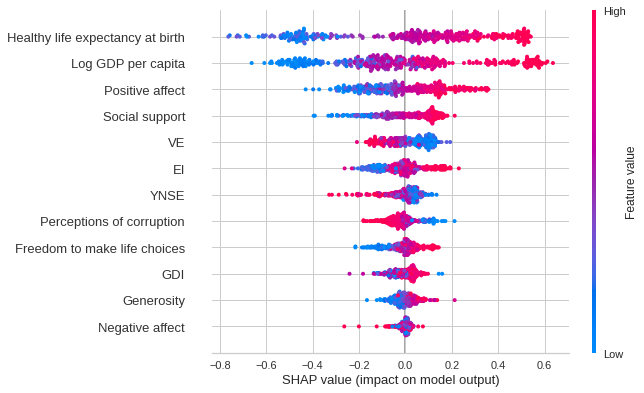

In [163]:
interpret_model(et5)

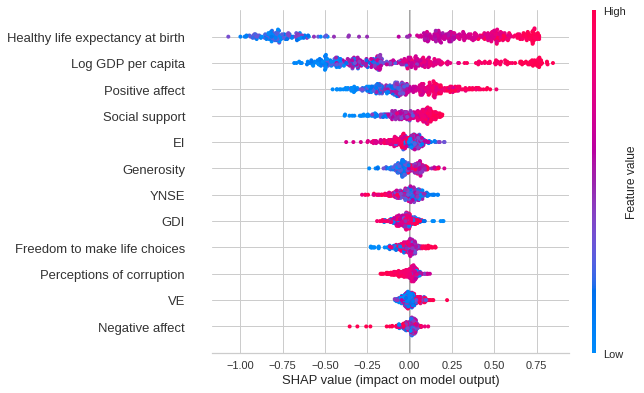

In [164]:
interpret_model(lightgbm5)

6.4. Gráficos do melhor modelo

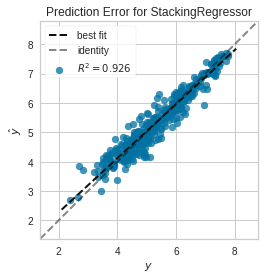

In [165]:
plot_model(stacked_models2_5, plot = 'error')

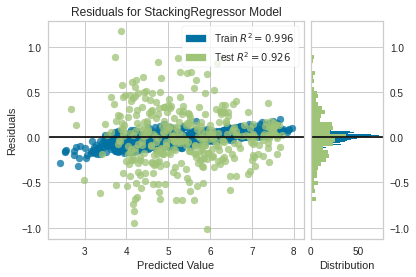

In [166]:
plot_model(stacked_models2_5, plot = 'residuals')

---

---
#### 7. TESTES ADICIONAIS COM O *DATAFRAME* BASE DO MELHOR MODELO (*df5*)

7.1. Modelos executados com alteração do tamanho da base de treino (para 60 e 80%)

a) Base de treinamento de 60%

In [167]:
df5_models_t1a = setup (data = df5, target ='Life Ladder', session_id=123, normalize = True, silent = True, train_size = 0.6)

,Description,Value
0,session_id,123
1,Target,Life Ladder
2,Original Data,"(1217, 13)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(730, 12)"


In [168]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2741,0.1437,0.3775,0.8878,0.0672,0.0572,0.512
lightgbm,Light Gradient Boosting Machine,0.3007,0.1662,0.4061,0.8696,0.0712,0.0616,0.099
rf,Random Forest Regressor,0.2988,0.1680,0.4081,0.8677,0.0720,0.0621,0.699
gbr,Gradient Boosting Regressor,0.3301,0.1943,0.4396,0.8466,0.0764,0.0674,0.198
knn,K Neighbors Regressor,0.3256,0.1971,0.4418,0.8448,0.0768,0.0674,0.064
ada,AdaBoost Regressor,0.3936,0.2463,0.4956,0.8059,0.0839,0.0782,0.146
dt,Decision Tree Regressor,0.3859,0.3018,0.5457,0.7605,0.0947,0.0791,0.021
ridge,Ridge Regression,0.4218,0.3074,0.5540,0.7576,0.0943,0.0850,0.017
lar,Least Angle Regression,0.4218,0.3075,0.5541,0.7576,0.0943,0.0850,0.019
lr,Linear Regression,0.4218,0.3075,0.5541,0.7576,0.0943,0.0850,0.016


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [169]:
et5_t1a = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2823,0.1376,0.3709,0.8741,0.0635,0.0561
1,0.2569,0.1146,0.3385,0.9056,0.0613,0.0531
2,0.3018,0.1763,0.4199,0.8556,0.0733,0.0618
3,0.2964,0.1874,0.4328,0.8585,0.0777,0.0608
4,0.2389,0.1100,0.3317,0.9170,0.0539,0.0464
5,0.2525,0.1277,0.3573,0.8939,0.0654,0.0550
6,0.2676,0.1367,0.3697,0.9207,0.0682,0.0580
7,0.2611,0.1231,0.3509,0.8773,0.0608,0.0537
8,0.2764,0.1457,0.3817,0.8787,0.0703,0.0589


In [170]:
lightgbm5_t1a = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3310,0.1787,0.4227,0.8364,0.0708,0.0639
1,0.2760,0.1279,0.3576,0.8947,0.0628,0.0551
2,0.3342,0.2038,0.4515,0.8331,0.0788,0.0684
3,0.3312,0.2172,0.4661,0.8360,0.0826,0.0671
4,0.2694,0.1379,0.3714,0.8960,0.0597,0.0516
5,0.2834,0.1634,0.4042,0.8643,0.0736,0.0616
6,0.2847,0.1515,0.3892,0.9121,0.0705,0.0609
7,0.2737,0.1277,0.3573,0.8727,0.0595,0.0547
8,0.2985,0.1744,0.4176,0.8547,0.0763,0.0619


In [171]:
rf5_t1a = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3028,0.1584,0.3980,0.8550,0.0670,0.0596
1,0.2906,0.1439,0.3794,0.8814,0.0676,0.0595
2,0.3291,0.2021,0.4496,0.8345,0.0796,0.0681
3,0.3090,0.1902,0.4362,0.8564,0.0770,0.0622
4,0.2657,0.1370,0.3701,0.8967,0.0594,0.0512
5,0.3125,0.2277,0.4772,0.8108,0.0871,0.0702
6,0.2882,0.1565,0.3956,0.9092,0.0720,0.0622
7,0.2739,0.1208,0.3476,0.8796,0.0583,0.0553
8,0.3167,0.1887,0.4344,0.8428,0.0788,0.0666


In [172]:
blend2_5_t1a = blend_models(estimator_list = [et5,lightgbm5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2886,0.1454,0.3814,0.8669,0.0646,0.0564
1,0.2612,0.1158,0.3403,0.9046,0.0609,0.0531
2,0.3128,0.1832,0.4281,0.8499,0.0749,0.0642
3,0.3098,0.1966,0.4433,0.8516,0.0791,0.0633
4,0.2482,0.1191,0.3451,0.9102,0.0557,0.0479
5,0.2554,0.1365,0.3695,0.8866,0.0678,0.0559
6,0.2723,0.1370,0.3701,0.9205,0.0678,0.0587
7,0.2593,0.1162,0.3408,0.8842,0.0574,0.0525
8,0.2822,0.1514,0.3892,0.8739,0.0715,0.0594


In [173]:
blend3_5_t1a = blend_models(estimator_list = [et5,lightgbm5,rf5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2868,0.1451,0.3810,0.8672,0.0644,0.0562
1,0.2694,0.1231,0.3509,0.8986,0.0628,0.0549
2,0.3136,0.1867,0.4320,0.8471,0.0760,0.0647
3,0.3057,0.1915,0.4376,0.8554,0.0779,0.0623
4,0.2528,0.1230,0.3506,0.9073,0.0565,0.0488
5,0.2727,0.1608,0.4010,0.8664,0.0737,0.0604
6,0.2739,0.1408,0.3753,0.9183,0.0687,0.0591
7,0.2601,0.1140,0.3376,0.8864,0.0567,0.0526
8,0.2886,0.1597,0.3996,0.8670,0.0731,0.0607


In [174]:
stacked_models2_5_t1a = stack_models(estimator_list=[et5,lightgbm5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2791,0.1385,0.3722,0.8732,0.0646,0.0555
1,0.2390,0.1004,0.3169,0.9173,0.0571,0.0490
2,0.2960,0.1662,0.4076,0.8639,0.0708,0.0602
3,0.3079,0.2025,0.4500,0.8471,0.0806,0.0630
4,0.2433,0.1165,0.3413,0.9122,0.0549,0.0470
5,0.2616,0.1317,0.3629,0.8906,0.0658,0.0562
6,0.2686,0.1377,0.3711,0.9201,0.0681,0.0576
7,0.2552,0.1216,0.3487,0.8787,0.0618,0.0529
8,0.2698,0.1404,0.3747,0.8831,0.0688,0.0569


In [175]:
stacked_models3_5_t1a = stack_models(estimator_list=[et5,lightgbm5,rf5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2781,0.1397,0.3737,0.8722,0.0649,0.0554
1,0.2382,0.0987,0.3141,0.9187,0.0566,0.0488
2,0.3010,0.1669,0.4085,0.8633,0.0704,0.0608
3,0.3101,0.2053,0.4531,0.8450,0.0812,0.0636
4,0.2408,0.1145,0.3384,0.9136,0.0545,0.0465
5,0.2561,0.1274,0.3570,0.8941,0.0646,0.0549
6,0.2686,0.1372,0.3704,0.9204,0.0679,0.0576
7,0.2619,0.1264,0.3556,0.8740,0.0633,0.0544
8,0.2688,0.1398,0.3739,0.8835,0.0686,0.0567


In [176]:
predict_model(stacked_models2_5_t1a)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.2611,0.1211,0.348,0.9105,0.0599,0.0532


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,EI,GDI,VE,YNSE,Life Ladder,Label
0,-0.702468,-1.060588,-1.811124,-0.107050,-0.093299,0.290430,-0.323992,1.796609,-1.148971,-1.606609,1.217643,1.802141,5.392012,4.764874
1,-1.050064,0.173588,-0.940188,-0.899634,0.426244,0.895413,-0.022769,-0.929107,-0.810169,-0.143802,0.716752,-0.471064,4.547335,4.130263
2,0.665982,1.022061,0.529183,0.447385,-0.151445,0.769140,0.718356,-0.073664,0.840127,0.934055,-0.692229,-0.744286,5.875932,5.985354
3,0.648188,0.595794,-0.299008,-0.912885,-1.730715,1.024279,-0.994823,-1.270276,0.654332,1.126531,-1.139067,-0.645926,5.388766,5.482580
4,-0.455485,0.026566,-0.301679,1.114002,-0.081245,0.225331,0.956295,0.719541,-0.012344,0.921224,0.068117,0.512534,5.312550,5.394171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,-0.392269,-0.340282,-0.160086,0.092831,0.070361,0.634876,1.243005,0.192873,-1.203617,-0.374772,0.194240,0.676467,5.743354,5.499639
483,0.224985,0.146461,0.403618,-1.595080,-0.610465,0.878392,-1.659686,1.537815,0.419356,0.459285,-0.313858,0.130024,5.101840,5.148420
484,-2.002468,-1.850307,-1.423744,-0.489593,-0.174616,0.173696,0.199936,1.809755,-2.285599,-2.697298,2.032042,0.774827,4.615674,4.492329
485,-1.217755,-2.115865,-0.395185,-0.669677,-0.086628,0.151390,-0.744187,0.229030,-1.263727,-1.131839,0.889722,1.255697,4.858481,4.579099


b) Base de treinamento de 80%

In [177]:
df5_models_t1b = setup (data = df5, target ='Life Ladder', session_id=123, normalize = True, silent = True, train_size = 0.8)

,Description,Value
0,session_id,123
1,Target,Life Ladder
2,Original Data,"(1217, 13)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(973, 12)"


In [178]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2538,0.1204,0.3462,0.9080,0.0615,0.0527,0.558
rf,Random Forest Regressor,0.2792,0.1442,0.3788,0.8898,0.0669,0.0578,0.810
lightgbm,Light Gradient Boosting Machine,0.2814,0.1447,0.3794,0.8894,0.0664,0.0576,0.130
knn,K Neighbors Regressor,0.3030,0.1695,0.4108,0.8708,0.0726,0.0632,0.064
gbr,Gradient Boosting Regressor,0.3261,0.1854,0.4295,0.8588,0.0742,0.0666,0.246
ada,AdaBoost Regressor,0.3987,0.2518,0.5012,0.8079,0.0843,0.0792,0.160
br,Bayesian Ridge,0.4143,0.2990,0.5455,0.7726,0.0930,0.0840,0.017
ridge,Ridge Regression,0.4143,0.2991,0.5455,0.7725,0.0930,0.0840,0.015
lar,Least Angle Regression,0.4143,0.2992,0.5456,0.7725,0.0930,0.0840,0.019
lr,Linear Regression,0.4143,0.2992,0.5456,0.7725,0.0930,0.0840,0.016


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [179]:
et5_t1b = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2289,0.0933,0.3054,0.9360,0.0563,0.0497
1,0.2707,0.1285,0.3584,0.9022,0.0603,0.0536
2,0.2818,0.1551,0.3939,0.8743,0.0723,0.0604
3,0.2339,0.1006,0.3173,0.9205,0.0571,0.0480
4,0.2536,0.1175,0.3428,0.9072,0.0607,0.0519
5,0.2599,0.1322,0.3636,0.8984,0.0626,0.0511
6,0.2461,0.1168,0.3417,0.9063,0.0614,0.0521
7,0.2528,0.1128,0.3359,0.9264,0.0602,0.0530
8,0.2429,0.1220,0.3493,0.8835,0.0604,0.0497


In [180]:
lightgbm5_t1b = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2566,0.1163,0.3410,0.9202,0.0613,0.0551
1,0.2916,0.1499,0.3872,0.8859,0.0643,0.0569
2,0.3306,0.1998,0.4470,0.8382,0.0798,0.0691
3,0.2740,0.1317,0.3629,0.8960,0.0639,0.0549
4,0.2722,0.1181,0.3437,0.9068,0.0605,0.0545
5,0.2875,0.1588,0.3985,0.8779,0.0685,0.0561
6,0.2694,0.1428,0.3779,0.8853,0.0668,0.0565
7,0.2919,0.1492,0.3863,0.9026,0.0679,0.0609
8,0.2587,0.1438,0.3792,0.8627,0.0644,0.0519


In [181]:
rf5_t1b = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2565,0.1173,0.3425,0.9195,0.0615,0.0551
1,0.3070,0.1636,0.4045,0.8755,0.0677,0.0603
2,0.3186,0.1924,0.4386,0.8441,0.0783,0.0666
3,0.2757,0.1327,0.3642,0.8952,0.0647,0.0563
4,0.2743,0.1314,0.3624,0.8963,0.0644,0.0560
5,0.2758,0.1529,0.3910,0.8824,0.0677,0.0545
6,0.2692,0.1555,0.3943,0.8752,0.0716,0.0586
7,0.2780,0.1361,0.3689,0.9112,0.0651,0.0577
8,0.2602,0.1278,0.3575,0.8780,0.0622,0.0531


In [182]:
blend2_5_t1b = blend_models(estimator_list = [et5,lightgbm5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2331,0.0966,0.3108,0.9337,0.0569,0.0504
1,0.2720,0.1329,0.3646,0.8988,0.0608,0.0534
2,0.3004,0.1708,0.4133,0.8616,0.0749,0.0636
3,0.2475,0.1097,0.3312,0.9134,0.0590,0.0502
4,0.2547,0.1117,0.3343,0.9118,0.0590,0.0515
5,0.2664,0.1395,0.3735,0.8928,0.0642,0.0523
6,0.2516,0.1217,0.3489,0.9023,0.0624,0.0532
7,0.2653,0.1237,0.3517,0.9193,0.0626,0.0557
8,0.2436,0.1263,0.3554,0.8794,0.0610,0.0495


In [183]:
blend3_5_t1b = blend_models(estimator_list = [et5,lightgbm5,rf5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2364,0.1002,0.3166,0.9312,0.0577,0.0512
1,0.2814,0.1400,0.3742,0.8935,0.0625,0.0553
2,0.3027,0.1742,0.4174,0.8588,0.0754,0.0639
3,0.2550,0.1138,0.3373,0.9101,0.0600,0.0518
4,0.2595,0.1154,0.3397,0.9089,0.0602,0.0527
5,0.2662,0.1417,0.3764,0.8911,0.0649,0.0524
6,0.2559,0.1302,0.3608,0.8955,0.0651,0.0547
7,0.2663,0.1248,0.3533,0.9186,0.0628,0.0557
8,0.2434,0.1230,0.3507,0.8826,0.0605,0.0495


In [184]:
stacked_models2_5_t1b = stack_models(estimator_list=[et5,lightgbm5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2224,0.0893,0.2989,0.9387,0.0539,0.0472
1,0.2810,0.1351,0.3675,0.8972,0.0627,0.0560
2,0.2737,0.1492,0.3863,0.8791,0.0706,0.0585
3,0.2220,0.0913,0.3022,0.9279,0.0546,0.0455
4,0.2458,0.1129,0.3359,0.9109,0.0586,0.0498
5,0.2645,0.1367,0.3698,0.8949,0.0636,0.0521
6,0.2431,0.1099,0.3315,0.9118,0.0593,0.0509
7,0.2533,0.1120,0.3346,0.9269,0.0598,0.0529
8,0.2392,0.1283,0.3582,0.8775,0.0627,0.0495


In [185]:
stacked_models3_5_t1b = stack_models(estimator_list=[et5,lightgbm5,rf5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2232,0.0890,0.2983,0.9389,0.0539,0.0474
1,0.2791,0.1338,0.3658,0.8982,0.0623,0.0556
2,0.2750,0.1492,0.3862,0.8791,0.0706,0.0589
3,0.2224,0.0914,0.3023,0.9278,0.0545,0.0455
4,0.2455,0.1130,0.3362,0.9108,0.0585,0.0497
5,0.2643,0.1362,0.3691,0.8953,0.0635,0.0521
6,0.2423,0.1095,0.3309,0.9121,0.0591,0.0506
7,0.2560,0.1137,0.3372,0.9258,0.0602,0.0534
8,0.2442,0.1315,0.3626,0.8744,0.0633,0.0505


In [186]:
predict_model(stacked_models2_5_t1b)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.2425,0.104,0.3226,0.9193,0.0559,0.0492


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,EI,GDI,VE,YNSE,Life Ladder,Label
0,-0.688173,-1.046822,-1.818310,-0.090920,-0.075664,0.290831,-0.316936,1.784077,-1.147383,-1.606153,1.220559,1.803133,5.392012,4.772704
1,-1.035298,0.178004,-0.942789,-0.869082,0.453458,0.890429,-0.017579,-0.913480,-0.807738,-0.147195,0.715626,-0.468591,4.547335,4.153901
2,0.678424,1.020048,0.534317,0.453428,-0.134882,0.765280,0.718954,-0.066875,0.846665,0.927825,-0.704728,-0.741635,5.875932,5.962867
3,0.660654,0.597011,-0.298234,-0.882092,-1.743267,1.018148,-0.983610,-1.251125,0.660407,1.119795,-1.155172,-0.643340,5.388766,5.517825
4,-0.441524,0.032096,-0.300919,1.107916,-0.063388,0.226313,0.955419,0.718136,-0.007927,0.915028,0.061754,0.514366,5.312550,5.433840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,-1.056479,-0.298451,0.128784,0.302531,1.098918,-0.177215,-1.583167,0.987201,-0.774869,-0.044812,1.482108,-0.282922,5.448725,4.824749
240,0.076207,0.041352,0.437634,0.427085,-1.002177,-0.364673,-1.165262,2.127448,0.424847,0.531092,0.047224,1.966959,5.062449,4.793481
241,-0.307900,-0.149543,0.209353,-0.107887,-0.961264,0.319060,1.068763,0.701924,-0.550265,0.479900,-0.058122,1.082298,6.018496,6.038331
242,-1.245811,-0.394963,-1.012616,0.208301,-0.458242,0.565269,0.548122,-1.513580,-1.980063,-1.017451,1.191499,1.923272,4.372156,4.099267


---
7.2. Modelos executados com exclusão de multicolinearidade (com limites mínimos de 70, 80 e 90%)

a) Colinearidade superior a 70%

In [187]:
df5_models_t2a = setup (data = df5, target ='Life Ladder', session_id=123, normalize = True, silent = True, remove_multicollinearity = True, multicollinearity_threshold = 0.7)

,Description,Value
0,session_id,123
1,Target,Life Ladder
2,Original Data,"(1217, 13)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(851, 7)"


In [188]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3098,0.1711,0.4119,0.8683,0.0719,0.0638,0.487
rf,Random Forest Regressor,0.3314,0.1958,0.4405,0.8490,0.0762,0.0679,0.613
lightgbm,Light Gradient Boosting Machine,0.3419,0.2065,0.4525,0.8404,0.0778,0.0695,0.090
knn,K Neighbors Regressor,0.3632,0.2352,0.4820,0.8188,0.0830,0.0747,0.066
gbr,Gradient Boosting Regressor,0.3715,0.2433,0.4916,0.8129,0.0842,0.0756,0.158
ada,AdaBoost Regressor,0.4286,0.2886,0.5359,0.7784,0.0902,0.0849,0.131
lar,Least Angle Regression,0.4498,0.3435,0.5833,0.7380,0.0980,0.0906,0.017
br,Bayesian Ridge,0.4498,0.3434,0.5833,0.7380,0.0979,0.0906,0.015
ridge,Ridge Regression,0.4498,0.3435,0.5833,0.7380,0.0980,0.0906,0.016
lr,Linear Regression,0.4498,0.3435,0.5833,0.7380,0.0980,0.0906,0.017


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [189]:
et5_t2a = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3299,0.1905,0.4365,0.8409,0.0702,0.0620
1,0.3141,0.1697,0.4120,0.8666,0.0751,0.0666
2,0.2717,0.1251,0.3537,0.9010,0.0629,0.0555
3,0.3208,0.1863,0.4316,0.8453,0.0753,0.0657
4,0.3113,0.1875,0.4331,0.8593,0.0768,0.0632
5,0.2396,0.1097,0.3312,0.9121,0.0544,0.0467
6,0.3351,0.2097,0.4580,0.8575,0.0816,0.0720
7,0.3078,0.1638,0.4047,0.8760,0.0699,0.0636
8,0.3313,0.1843,0.4292,0.8301,0.0751,0.0690


In [190]:
lightgbm5_t2a = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3664,0.2128,0.4613,0.8223,0.0734,0.0684
1,0.3560,0.2209,0.4700,0.8263,0.0838,0.0744
2,0.2893,0.1487,0.3856,0.8823,0.0672,0.0582
3,0.3823,0.2756,0.5250,0.7711,0.0909,0.0786
4,0.3757,0.2436,0.4936,0.8172,0.0858,0.0751
5,0.2893,0.1460,0.3821,0.8829,0.0615,0.0554
6,0.3398,0.2184,0.4673,0.8516,0.0813,0.0716
7,0.3290,0.1942,0.4407,0.8530,0.0736,0.0665
8,0.3351,0.2021,0.4495,0.8137,0.0794,0.0700


In [191]:
rf5_t2a = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3505,0.2005,0.4477,0.8326,0.0730,0.0659
1,0.3606,0.2293,0.4788,0.8197,0.0840,0.0746
2,0.2878,0.1554,0.3942,0.8770,0.0690,0.0586
3,0.3726,0.2432,0.4932,0.7980,0.0865,0.0769
4,0.3506,0.2324,0.4821,0.8257,0.0842,0.0705
5,0.2614,0.1298,0.3603,0.8959,0.0590,0.0508
6,0.3427,0.2296,0.4792,0.8440,0.0841,0.0736
7,0.3180,0.1655,0.4068,0.8748,0.0697,0.0655
8,0.3294,0.1845,0.4295,0.8299,0.0749,0.0682


In [192]:
blend2_5_t2a = blend_models(estimator_list = [et5,lightgbm5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3401,0.1937,0.4401,0.8383,0.0705,0.0637
1,0.3250,0.1864,0.4318,0.8534,0.0781,0.0685
2,0.2683,0.1290,0.3591,0.8979,0.0636,0.0546
3,0.3402,0.2130,0.4615,0.8231,0.0807,0.0700
4,0.3402,0.2080,0.4561,0.8440,0.0802,0.0686
5,0.2554,0.1188,0.3446,0.9048,0.0560,0.0494
6,0.3265,0.2060,0.4539,0.8600,0.0801,0.0696
7,0.3095,0.1709,0.4134,0.8706,0.0701,0.0632
8,0.3242,0.1851,0.4302,0.8294,0.0758,0.0677


In [193]:
blend3_5_t2a = blend_models(estimator_list = [et5,lightgbm5,rf5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3373,0.1891,0.4348,0.8422,0.0702,0.0632
1,0.3319,0.1959,0.4427,0.8459,0.0793,0.0695
2,0.2699,0.1341,0.3662,0.8938,0.0648,0.0551
3,0.3435,0.2169,0.4658,0.8198,0.0817,0.0709
4,0.3383,0.2110,0.4593,0.8418,0.0807,0.0683
5,0.2542,0.1196,0.3458,0.9041,0.0564,0.0493
6,0.3294,0.2105,0.4588,0.8570,0.0809,0.0704
7,0.3105,0.1657,0.4071,0.8746,0.0693,0.0636
8,0.3215,0.1813,0.4258,0.8328,0.0749,0.0671


In [194]:
stacked_models2_5_t2a = stack_models(estimator_list=[et5,lightgbm5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3329,0.1937,0.4401,0.8383,0.0714,0.0626
1,0.3088,0.1589,0.3986,0.8751,0.0723,0.0651
2,0.2763,0.1239,0.3520,0.9019,0.0625,0.0562
3,0.3226,0.1833,0.4281,0.8478,0.0741,0.0653
4,0.3143,0.1958,0.4425,0.8531,0.0787,0.0640
5,0.2441,0.1127,0.3357,0.9097,0.0549,0.0472
6,0.3335,0.2053,0.4531,0.8605,0.0802,0.0705
7,0.2973,0.1579,0.3973,0.8805,0.0693,0.0616
8,0.3389,0.1966,0.4433,0.8188,0.0771,0.0696


In [195]:
stacked_models3_5_t2a = stack_models(estimator_list=[et5,lightgbm5,rf5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3331,0.1942,0.4407,0.8378,0.0714,0.0626
1,0.3117,0.1656,0.4070,0.8698,0.0732,0.0654
2,0.2764,0.1239,0.3521,0.9019,0.0625,0.0562
3,0.3227,0.1835,0.4284,0.8476,0.0742,0.0653
4,0.3142,0.1960,0.4427,0.8530,0.0787,0.0640
5,0.2441,0.1130,0.3361,0.9094,0.0550,0.0472
6,0.3345,0.2060,0.4539,0.8600,0.0803,0.0706
7,0.2977,0.1585,0.3981,0.8800,0.0694,0.0616
8,0.3382,0.1955,0.4421,0.8198,0.0768,0.0694


In [196]:
predict_model(stacked_models2_5_t2a)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.2807,0.1376,0.371,0.8974,0.0652,0.0578


,Log GDP per capita,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,YNSE,Life Ladder,Label
0,-0.703099,-0.103066,-0.086739,0.298881,-0.329459,1.806347,1.813531,5.392012,4.514944
1,-1.050709,-0.891966,0.437041,0.900402,-0.030803,-0.919406,-0.463504,4.547335,4.216330
2,0.665414,0.448793,-0.145359,0.774852,0.704006,-0.063952,-0.737186,5.875932,5.927074
3,0.647619,-0.905155,-1.737506,1.028531,-0.994573,-1.260579,-0.638660,5.388766,5.432606
4,-0.456104,1.112311,-0.074587,0.234156,0.939918,0.729264,0.521752,5.312550,5.696879
...,...,...,...,...,...,...,...,...,...
361,0.615141,-1.353966,-1.473983,1.230513,-0.944562,-0.156605,-0.310242,5.595575,5.271835
362,1.072970,-1.545675,0.112888,0.575035,-0.793546,-0.440240,-0.583924,5.873887,5.950939
363,-2.117504,0.216729,-0.327165,-1.044732,-0.089846,-1.249740,0.094808,4.555830,4.113555
364,-1.272901,-0.795333,-0.990442,0.678170,0.379095,-1.086210,1.835426,3.834202,4.102917


b) Colinearidade superior a 80%

In [197]:
df5_models_t2b = setup (data = df5, target ='Life Ladder', session_id=123, normalize = True, silent = True, remove_multicollinearity = True, multicollinearity_threshold = 0.8)

,Description,Value
0,session_id,123
1,Target,Life Ladder
2,Original Data,"(1217, 13)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(851, 9)"


In [198]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2907,0.1540,0.3900,0.8819,0.0681,0.0599,0.501
rf,Random Forest Regressor,0.3109,0.1756,0.4160,0.8647,0.0722,0.0638,0.673
lightgbm,Light Gradient Boosting Machine,0.3169,0.1785,0.4189,0.8620,0.0719,0.0640,0.104
knn,K Neighbors Regressor,0.3408,0.2138,0.4585,0.8347,0.0796,0.0702,0.063
gbr,Gradient Boosting Regressor,0.3559,0.2191,0.4658,0.8313,0.0797,0.0722,0.185
ada,AdaBoost Regressor,0.4150,0.2748,0.5229,0.7888,0.0876,0.0820,0.140
lar,Least Angle Regression,0.4293,0.3206,0.5636,0.7547,0.0947,0.0864,0.018
br,Bayesian Ridge,0.4291,0.3206,0.5635,0.7547,0.0947,0.0864,0.016
ridge,Ridge Regression,0.4293,0.3206,0.5635,0.7547,0.0947,0.0864,0.018
lr,Linear Regression,0.4293,0.3206,0.5636,0.7547,0.0947,0.0864,0.018


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [199]:
et5_t2b = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2917,0.1455,0.3814,0.8786,0.0611,0.0545
1,0.3189,0.1819,0.4265,0.8570,0.0762,0.0674
2,0.2391,0.0962,0.3101,0.9239,0.0551,0.0485
3,0.3006,0.1618,0.4022,0.8656,0.0691,0.0602
4,0.3060,0.1890,0.4347,0.8583,0.0769,0.0624
5,0.2234,0.0960,0.3098,0.9231,0.0515,0.0438
6,0.3103,0.1824,0.4271,0.8761,0.0770,0.0673
7,0.2925,0.1463,0.3825,0.8893,0.0679,0.0617
8,0.3018,0.1636,0.4045,0.8492,0.0704,0.0629


In [200]:
lightgbm5_t2b = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3135,0.1612,0.4015,0.8654,0.0633,0.0583
1,0.3540,0.2269,0.4764,0.8216,0.0836,0.0741
2,0.2618,0.1115,0.3339,0.9118,0.0574,0.0517
3,0.3309,0.1843,0.4293,0.8469,0.0745,0.0665
4,0.3764,0.2627,0.5126,0.8029,0.0885,0.0746
5,0.2435,0.1052,0.3244,0.9157,0.0519,0.0465
6,0.3036,0.1778,0.4217,0.8792,0.0746,0.0642
7,0.3150,0.1737,0.4168,0.8685,0.0712,0.0644
8,0.3378,0.2084,0.4566,0.8078,0.0791,0.0691


In [201]:
rf5_t2b = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3173,0.1648,0.4059,0.8624,0.0650,0.0591
1,0.3609,0.2401,0.4900,0.8112,0.0870,0.0761
2,0.2721,0.1269,0.3562,0.8996,0.0619,0.0546
3,0.3503,0.2144,0.4630,0.8219,0.0806,0.0717
4,0.3409,0.2170,0.4658,0.8372,0.0814,0.0686
5,0.2257,0.1026,0.3204,0.9177,0.0528,0.0440
6,0.3209,0.2006,0.4478,0.8637,0.0802,0.0697
7,0.3034,0.1468,0.3831,0.8889,0.0664,0.0630
8,0.3049,0.1701,0.4124,0.8432,0.0714,0.0626


In [202]:
blend2_5_t2b = blend_models(estimator_list = [et5,lightgbm5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2983,0.1461,0.3823,0.8780,0.0608,0.0555
1,0.3261,0.1950,0.4416,0.8467,0.0784,0.0687
2,0.2444,0.0972,0.3118,0.9231,0.0546,0.0489
3,0.3057,0.1614,0.4017,0.8659,0.0694,0.0616
4,0.3366,0.2154,0.4641,0.8385,0.0811,0.0676
5,0.2252,0.0938,0.3063,0.9248,0.0500,0.0435
6,0.2978,0.1747,0.4180,0.8813,0.0748,0.0639
7,0.2972,0.1508,0.3884,0.8858,0.0675,0.0618
8,0.3044,0.1752,0.4186,0.8384,0.0729,0.0633


In [203]:
blend3_5_t2b = blend_models(estimator_list = [et5,lightgbm5,rf5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2981,0.1465,0.3827,0.8777,0.0611,0.0556
1,0.3337,0.2060,0.4539,0.8380,0.0807,0.0704
2,0.2509,0.1037,0.3220,0.9180,0.0564,0.0503
3,0.3156,0.1735,0.4165,0.8559,0.0724,0.0640
4,0.3333,0.2119,0.4603,0.8410,0.0806,0.0671
5,0.2216,0.0947,0.3078,0.9240,0.0504,0.0429
6,0.3031,0.1796,0.4238,0.8780,0.0760,0.0654
7,0.2967,0.1451,0.3810,0.8901,0.0663,0.0618
8,0.3009,0.1705,0.4129,0.8428,0.0718,0.0624


In [204]:
stacked_models2_5_t2b = stack_models(estimator_list=[et5,lightgbm5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2991,0.1481,0.3848,0.8764,0.0626,0.0562
1,0.3122,0.1743,0.4175,0.8630,0.0744,0.0657
2,0.2293,0.0857,0.2928,0.9321,0.0517,0.0462
3,0.2871,0.1552,0.3940,0.8711,0.0671,0.0567
4,0.3140,0.2014,0.4488,0.8489,0.0795,0.0641
5,0.2278,0.0982,0.3134,0.9212,0.0519,0.0444
6,0.3085,0.1745,0.4177,0.8814,0.0749,0.0659
7,0.2812,0.1455,0.3814,0.8899,0.0684,0.0594
8,0.3054,0.1686,0.4106,0.8445,0.0713,0.0632


In [205]:
stacked_models3_5_t2b = stack_models(estimator_list=[et5,lightgbm5,rf5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3036,0.1542,0.3927,0.8713,0.0633,0.0567
1,0.3111,0.1732,0.4162,0.8638,0.0741,0.0654
2,0.2259,0.0833,0.2887,0.9340,0.0509,0.0455
3,0.2866,0.1541,0.3926,0.8720,0.0669,0.0565
4,0.3141,0.2016,0.4490,0.8488,0.0795,0.0641
5,0.2285,0.0981,0.3132,0.9214,0.0519,0.0446
6,0.3081,0.1746,0.4179,0.8813,0.0749,0.0659
7,0.2824,0.1470,0.3834,0.8888,0.0688,0.0597
8,0.3075,0.1699,0.4122,0.8433,0.0717,0.0638


In [206]:
predict_model(stacked_models2_5_t2b)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.2666,0.1269,0.3562,0.9054,0.0621,0.0549


,Log GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,GDI,YNSE,Life Ladder,Label
0,-0.703099,-1.073563,-0.103066,-0.086739,0.298881,-0.329459,1.806347,-1.614747,1.813531,5.392012,4.678253
1,-1.050709,0.164988,-0.891966,0.437041,0.900402,-0.030803,-0.919406,-0.154534,-0.463504,4.547335,4.254576
2,0.665414,1.016469,0.448793,-0.145359,0.774852,0.704006,-0.063952,0.921411,-0.737186,5.875932,6.017224
3,0.647619,0.588691,-0.905155,-1.737506,1.028531,-0.994573,-1.260579,1.113545,-0.638660,5.388766,5.488269
4,-0.456104,0.017445,1.112311,-0.074587,0.234156,0.939918,0.729264,0.908603,0.521752,5.312550,5.471391
...,...,...,...,...,...,...,...,...,...,...,...
361,0.615141,-0.120310,-1.353966,-1.473983,1.230513,-0.944562,-0.156605,0.665234,-0.310242,5.595575,5.314140
362,1.072970,-0.034454,-1.545675,0.112888,0.575035,-0.793546,-0.440240,-0.052063,-0.583924,5.873887,5.880319
363,-2.117504,0.052971,0.216729,-0.327165,-1.044732,-0.089846,-1.249740,-3.010915,0.094808,4.555830,4.380167
364,-1.272901,-1.700697,-0.795333,-0.990442,0.678170,0.379095,-1.086210,-0.846214,1.835426,3.834202,4.071888


c) Colinearidade superior a 90%

In [207]:
df5_models_t2c = setup (data = df5, target ='Life Ladder', session_id=123, normalize = True, silent = True, remove_multicollinearity = True, multicollinearity_threshold = 0.9)

,Description,Value
0,session_id,123
1,Target,Life Ladder
2,Original Data,"(1217, 13)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(851, 10)"


In [208]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2749,0.1420,0.3740,0.8905,0.0659,0.0568,0.510
lightgbm,Light Gradient Boosting Machine,0.3039,0.1720,0.4119,0.8673,0.0716,0.0620,0.110
rf,Random Forest Regressor,0.3050,0.1734,0.4137,0.8666,0.0722,0.0628,0.708
knn,K Neighbors Regressor,0.3212,0.1916,0.4345,0.8514,0.0757,0.0664,0.064
gbr,Gradient Boosting Regressor,0.3342,0.2022,0.4476,0.8443,0.0766,0.0676,0.199
ada,AdaBoost Regressor,0.4141,0.2754,0.5235,0.7889,0.0880,0.0822,0.144
br,Bayesian Ridge,0.4220,0.3073,0.5517,0.7646,0.0934,0.0850,0.015
ridge,Ridge Regression,0.4220,0.3074,0.5518,0.7645,0.0934,0.0850,0.015
lar,Least Angle Regression,0.4221,0.3074,0.5518,0.7644,0.0935,0.0850,0.018
lr,Linear Regression,0.4221,0.3074,0.5518,0.7644,0.0935,0.0850,0.016


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [209]:
et5_t2c = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2686,0.1315,0.3627,0.8902,0.0592,0.0507
1,0.3155,0.1974,0.4443,0.8448,0.0801,0.0677
2,0.2292,0.0929,0.3048,0.9265,0.0548,0.0467
3,0.2891,0.1520,0.3899,0.8737,0.0672,0.0579
4,0.3114,0.1917,0.4378,0.8562,0.0777,0.0633
5,0.2074,0.0865,0.2942,0.9306,0.0485,0.0404
6,0.2708,0.1406,0.3750,0.9044,0.0686,0.0588
7,0.2784,0.1273,0.3568,0.9037,0.0638,0.0590
8,0.2817,0.1520,0.3899,0.8598,0.0687,0.0591


In [210]:
lightgbm5_t2c = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3008,0.1583,0.3979,0.8678,0.0644,0.0566
1,0.3552,0.2396,0.4895,0.8116,0.0868,0.0755
2,0.2693,0.1279,0.3577,0.8988,0.0637,0.0543
3,0.3253,0.1760,0.4195,0.8538,0.0722,0.0649
4,0.3530,0.2334,0.4831,0.8250,0.0847,0.0705
5,0.2279,0.1022,0.3196,0.9181,0.0522,0.0443
6,0.2923,0.1806,0.4249,0.8773,0.0764,0.0626
7,0.2971,0.1596,0.3995,0.8792,0.0692,0.0620
8,0.2989,0.1778,0.4217,0.8360,0.0741,0.0621


In [211]:
rf5_t2c = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3143,0.1724,0.4152,0.8561,0.0670,0.0589
1,0.3409,0.2221,0.4713,0.8254,0.0834,0.0717
2,0.2814,0.1363,0.3692,0.8921,0.0651,0.0572
3,0.3144,0.1724,0.4153,0.8568,0.0725,0.0637
4,0.3335,0.2216,0.4707,0.8338,0.0825,0.0674
5,0.2407,0.1093,0.3306,0.9124,0.0543,0.0468
6,0.3207,0.2380,0.4878,0.8383,0.0881,0.0711
7,0.3051,0.1480,0.3847,0.8880,0.0668,0.0635
8,0.2962,0.1622,0.4028,0.8504,0.0709,0.0614


In [212]:
blend2_5_t2c = blend_models(estimator_list = [et5,lightgbm5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2789,0.1375,0.3709,0.8852,0.0602,0.0526
1,0.3233,0.2097,0.4579,0.8351,0.0820,0.0692
2,0.2381,0.1025,0.3202,0.9188,0.0575,0.0485
3,0.3009,0.1572,0.3965,0.8694,0.0683,0.0601
4,0.3265,0.2042,0.4518,0.8469,0.0795,0.0659
5,0.2074,0.0877,0.2962,0.9297,0.0486,0.0404
6,0.2751,0.1526,0.3906,0.8963,0.0712,0.0595
7,0.2822,0.1347,0.3670,0.8981,0.0647,0.0593
8,0.2836,0.1571,0.3964,0.8552,0.0698,0.0593


In [213]:
blend3_5_t2c = blend_models(estimator_list = [et5,lightgbm5,rf5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2884,0.1454,0.3813,0.8786,0.0618,0.0542
1,0.3227,0.2104,0.4587,0.8346,0.0819,0.0688
2,0.2486,0.1105,0.3324,0.9125,0.0593,0.0507
3,0.3023,0.1595,0.3994,0.8675,0.0691,0.0607
4,0.3250,0.2066,0.4545,0.8450,0.0801,0.0656
5,0.2154,0.0927,0.3045,0.9257,0.0501,0.0420
6,0.2880,0.1752,0.4185,0.8810,0.0763,0.0629
7,0.2873,0.1363,0.3692,0.8968,0.0648,0.0602
8,0.2844,0.1556,0.3944,0.8566,0.0695,0.0593


In [214]:
stacked_models2_5_t2c = stack_models(estimator_list=[et5,lightgbm5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2791,0.1402,0.3744,0.8830,0.0624,0.0531
1,0.3098,0.1896,0.4354,0.8510,0.0783,0.0662
2,0.2163,0.0849,0.2913,0.9328,0.0525,0.0441
3,0.2787,0.1472,0.3837,0.8777,0.0654,0.0551
4,0.3186,0.2008,0.4481,0.8494,0.0796,0.0648
5,0.2179,0.0909,0.3015,0.9271,0.0495,0.0421
6,0.2753,0.1348,0.3672,0.9084,0.0663,0.0588
7,0.2727,0.1281,0.3578,0.9031,0.0652,0.0582
8,0.2790,0.1494,0.3865,0.8623,0.0679,0.0582


In [215]:
stacked_models3_5_t2c = stack_models(estimator_list=[et5,lightgbm5,rf5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2749,0.1371,0.3703,0.8855,0.0615,0.0523
1,0.3091,0.1899,0.4358,0.8507,0.0785,0.0662
2,0.2132,0.0832,0.2885,0.9341,0.0521,0.0435
3,0.2790,0.1474,0.3839,0.8776,0.0652,0.0550
4,0.3176,0.1991,0.4462,0.8507,0.0792,0.0645
5,0.2146,0.0891,0.2986,0.9285,0.0490,0.0415
6,0.2717,0.1312,0.3623,0.9108,0.0654,0.0578
7,0.2764,0.1294,0.3598,0.9020,0.0656,0.0590
8,0.2825,0.1545,0.3931,0.8576,0.0690,0.0592


In [216]:
predict_model(stacked_models2_5_t2c)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.2536,0.1123,0.335,0.9163,0.0582,0.0521


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,GDI,YNSE,Life Ladder,Label
0,-0.703099,-1.073563,-1.851479,-0.103066,-0.086739,0.298881,-0.329459,1.806347,-1.614747,1.813531,5.392012,4.711103
1,-1.050709,0.164988,-0.969125,-0.891966,0.437041,0.900402,-0.030803,-0.919406,-0.154534,-0.463504,4.547335,3.974077
2,0.665414,1.016469,0.519510,0.448793,-0.145359,0.774852,0.704006,-0.063952,0.921411,-0.737186,5.875932,6.003496
3,0.647619,0.588691,-0.319539,-0.905155,-1.737506,1.028531,-0.994573,-1.260579,1.113545,-0.638660,5.388766,5.566235
4,-0.456104,0.017445,-0.322245,1.112311,-0.074587,0.234156,0.939918,0.729264,0.908603,0.521752,5.312550,5.449881
...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.615141,-0.120310,0.557402,-1.353966,-1.473983,1.230513,-0.944562,-0.156605,0.665234,-0.310242,5.595575,5.345173
362,1.072970,-0.034454,1.288186,-1.545675,0.112888,0.575035,-0.793546,-0.440240,-0.052063,-0.583924,5.873887,5.861503
363,-2.117504,0.052971,-1.875838,0.216729,-0.327165,-1.044732,-0.089846,-1.249740,-3.010915,0.094808,4.555830,4.250373
364,-1.272901,-1.700697,-0.977244,-0.795333,-0.990442,0.678170,0.379095,-1.086210,-0.846214,1.835426,3.834202,3.890354


---
7.3. Modelos executados com remoção de *outliers* (com limites máximos de 5 e 10%)

a) Até 5% de outliers

In [217]:
df5_models_t3a = setup (data = df5, target ='Life Ladder', session_id=123, normalize = True, silent = True, remove_outliers = True, outliers_threshold = 0.05)

,Description,Value
0,session_id,123
1,Target,Life Ladder
2,Original Data,"(1217, 13)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(808, 12)"


In [218]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2643,0.1339,0.3631,0.8902,0.0629,0.0536,0.519
rf,Random Forest Regressor,0.2875,0.1541,0.3908,0.8733,0.0677,0.0583,0.716
lightgbm,Light Gradient Boosting Machine,0.2951,0.1577,0.3951,0.8696,0.0678,0.0593,0.111
knn,K Neighbors Regressor,0.3126,0.1791,0.4202,0.8530,0.0717,0.0630,0.064
gbr,Gradient Boosting Regressor,0.3206,0.1833,0.4260,0.8495,0.0719,0.0636,0.212
ada,AdaBoost Regressor,0.3904,0.2453,0.4936,0.8002,0.0814,0.0757,0.148
dt,Decision Tree Regressor,0.3925,0.2928,0.5355,0.7606,0.0918,0.0788,0.022
br,Bayesian Ridge,0.4138,0.2973,0.5430,0.7567,0.0910,0.0821,0.016
huber,Huber Regressor,0.4112,0.2977,0.5434,0.7566,0.0913,0.0821,0.028
ridge,Ridge Regression,0.4141,0.2977,0.5433,0.7563,0.0911,0.0821,0.015


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [219]:
et5_t3a = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2702,0.1361,0.3689,0.8796,0.0592,0.0504
1,0.3069,0.1790,0.4231,0.8525,0.0732,0.0629
2,0.2307,0.0996,0.3156,0.9231,0.0577,0.0481
3,0.2643,0.1209,0.3477,0.8847,0.0581,0.0513
4,0.2932,0.1738,0.4169,0.8743,0.0735,0.0592
5,0.1893,0.0695,0.2635,0.9373,0.0408,0.0347
6,0.2577,0.1345,0.3667,0.9066,0.0666,0.0555
7,0.2583,0.1210,0.3478,0.8998,0.0610,0.0535
8,0.2760,0.1502,0.3876,0.8355,0.0671,0.0564


In [220]:
lightgbm5_t3a = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3117,0.1550,0.3936,0.8629,0.0636,0.0582
1,0.3476,0.2277,0.4772,0.8124,0.0821,0.0713
2,0.2848,0.1415,0.3762,0.8907,0.0672,0.0585
3,0.2986,0.1340,0.3661,0.8721,0.0597,0.0567
4,0.3107,0.1822,0.4268,0.8682,0.0750,0.0621
5,0.2262,0.1010,0.3179,0.9088,0.0500,0.0425
6,0.2769,0.1443,0.3799,0.8997,0.0684,0.0585
7,0.2900,0.1509,0.3884,0.8750,0.0662,0.0594
8,0.3097,0.1846,0.4296,0.7978,0.0740,0.0622


In [221]:
rf5_t3a = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3004,0.1564,0.3954,0.8617,0.0631,0.0558
1,0.3273,0.2018,0.4492,0.8337,0.0779,0.0671
2,0.2779,0.1405,0.3748,0.8915,0.0677,0.0578
3,0.2826,0.1354,0.3680,0.8708,0.0608,0.0546
4,0.2999,0.1748,0.4181,0.8736,0.0736,0.0601
5,0.2240,0.0969,0.3112,0.9126,0.0491,0.0421
6,0.2887,0.1851,0.4302,0.8714,0.0792,0.0637
7,0.2948,0.1367,0.3697,0.8868,0.0640,0.0607
8,0.2911,0.1666,0.4082,0.8174,0.0710,0.0587


In [222]:
blend2_5_t3a = blend_models(estimator_list = [et5,lightgbm5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2822,0.1393,0.3732,0.8768,0.0602,0.0528
1,0.3128,0.1966,0.4434,0.8380,0.0766,0.0642
2,0.2500,0.1130,0.3362,0.9127,0.0608,0.0517
3,0.2766,0.1215,0.3486,0.8840,0.0576,0.0531
4,0.2975,0.1744,0.4176,0.8739,0.0736,0.0599
5,0.1976,0.0782,0.2797,0.9294,0.0437,0.0367
6,0.2588,0.1312,0.3622,0.9088,0.0658,0.0552
7,0.2702,0.1283,0.3582,0.8937,0.0622,0.0557
8,0.2847,0.1573,0.3966,0.8276,0.0684,0.0578


In [223]:
blend3_5_t3a = blend_models(estimator_list = [et5,lightgbm5,rf5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2872,0.1424,0.3773,0.8741,0.0606,0.0536
1,0.3130,0.1952,0.4418,0.8391,0.0765,0.0644
2,0.2550,0.1181,0.3437,0.9087,0.0622,0.0530
3,0.2769,0.1230,0.3507,0.8826,0.0579,0.0533
4,0.2952,0.1714,0.4140,0.8760,0.0731,0.0594
5,0.2022,0.0814,0.2853,0.9266,0.0447,0.0377
6,0.2679,0.1445,0.3801,0.8996,0.0697,0.0579
7,0.2721,0.1280,0.3578,0.8940,0.0622,0.0561
8,0.2821,0.1567,0.3958,0.8283,0.0685,0.0572


In [224]:
stacked_models2_5_t3a = stack_models(estimator_list=[et5,lightgbm5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2838,0.1467,0.3830,0.8702,0.0627,0.0535
1,0.3036,0.1783,0.4223,0.8530,0.0732,0.0623
2,0.2176,0.0909,0.3014,0.9298,0.0553,0.0454
3,0.2702,0.1236,0.3516,0.8820,0.0588,0.0522
4,0.2940,0.1816,0.4261,0.8687,0.0751,0.0592
5,0.1919,0.0722,0.2688,0.9348,0.0418,0.0353
6,0.2588,0.1302,0.3608,0.9095,0.0647,0.0546
7,0.2445,0.1153,0.3396,0.9045,0.0602,0.0510
8,0.2788,0.1537,0.3920,0.8316,0.0677,0.0566


In [225]:
stacked_models3_5_t3a = stack_models(estimator_list=[et5,lightgbm5,rf5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2825,0.1449,0.3807,0.8718,0.0621,0.0533
1,0.3053,0.1800,0.4242,0.8517,0.0734,0.0626
2,0.2176,0.0909,0.3014,0.9298,0.0553,0.0454
3,0.2702,0.1236,0.3515,0.8821,0.0588,0.0522
4,0.2956,0.1825,0.4272,0.8680,0.0753,0.0595
5,0.1902,0.0710,0.2665,0.9359,0.0414,0.0349
6,0.2620,0.1331,0.3648,0.9075,0.0656,0.0555
7,0.2454,0.1160,0.3406,0.9039,0.0603,0.0511
8,0.2825,0.1562,0.3952,0.8289,0.0681,0.0574


In [226]:
predict_model(stacked_models2_5_t3a)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.2473,0.1131,0.3363,0.9156,0.0608,0.0523


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,EI,GDI,VE,YNSE,Life Ladder,Label
0,-0.703099,-1.073563,-1.851479,-0.103066,-0.086739,0.298881,-0.329459,1.806347,-1.153387,-1.614747,1.229951,1.813531,5.392012,4.536643
1,-1.050709,0.164988,-0.969125,-0.891966,0.437041,0.900402,-0.030803,-0.919406,-0.814222,-0.154534,0.725241,-0.463504,4.547335,4.097155
2,0.665414,1.016469,0.519510,0.448793,-0.145359,0.774852,0.704006,-0.063952,0.837839,0.921411,-0.694482,-0.737186,5.875932,5.938168
3,0.647619,0.588691,-0.319539,-0.905155,-1.737506,1.028531,-0.994573,-1.260579,0.651846,1.113545,-1.144727,-0.638660,5.388766,5.509298
4,-0.456104,0.017445,-0.322245,1.112311,-0.074587,0.234156,0.939918,0.729264,-0.015543,0.908603,0.071660,0.521752,5.312550,5.408047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.615141,-0.120310,0.557402,-1.353966,-1.473983,1.230513,-0.944562,-0.156605,0.487734,0.665234,-0.734423,-0.310242,5.595575,5.367015
362,1.072970,-0.034454,1.288186,-1.545675,0.112888,0.575035,-0.793546,-0.440240,1.100419,-0.052063,-0.650910,-0.583924,5.873887,5.930607
363,-2.117504,0.052971,-1.875838,0.216729,-0.327165,-1.044732,-0.089846,-1.249740,-2.597574,-3.010915,1.890794,0.094808,4.555830,4.217253
364,-1.272901,-1.700697,-0.977244,-0.795333,-0.990442,0.678170,0.379095,-1.086210,-1.968478,-0.846214,1.171855,1.835426,3.834202,4.001550


b) Até 10% de outliers

In [227]:
df5_models_t3b = setup (data = df5, target ='Life Ladder', session_id=123, normalize = True, silent = True, remove_outliers = True, outliers_threshold = 0.10)

,Description,Value
0,session_id,123
1,Target,Life Ladder
2,Original Data,"(1217, 13)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(766, 12)"


In [228]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2606,0.1299,0.3584,0.8856,0.0615,0.0521,0.516
rf,Random Forest Regressor,0.2887,0.1536,0.3908,0.8642,0.0670,0.0578,0.707
lightgbm,Light Gradient Boosting Machine,0.2881,0.1553,0.3919,0.8636,0.0667,0.0575,0.104
knn,K Neighbors Regressor,0.3043,0.1723,0.4126,0.8476,0.0700,0.0608,0.064
gbr,Gradient Boosting Regressor,0.3184,0.1874,0.4304,0.8357,0.0726,0.0629,0.204
ada,AdaBoost Regressor,0.3767,0.2331,0.4814,0.7944,0.0794,0.0729,0.143
huber,Huber Regressor,0.4059,0.2861,0.5321,0.7505,0.0883,0.0800,0.029
br,Bayesian Ridge,0.4071,0.2867,0.5325,0.7498,0.0882,0.0799,0.016
ridge,Ridge Regression,0.4074,0.2870,0.5328,0.7493,0.0883,0.0800,0.015
lr,Linear Regression,0.4075,0.2871,0.5329,0.7492,0.0883,0.0800,0.015


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [229]:
et5_t3b = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2619,0.1268,0.3560,0.8689,0.0568,0.0483
1,0.2929,0.1650,0.4062,0.8655,0.0708,0.0601
2,0.2321,0.0986,0.3139,0.9264,0.0575,0.0486
3,0.2506,0.1156,0.3399,0.8820,0.0556,0.0474
4,0.2860,0.1581,0.3977,0.8655,0.0671,0.0546
5,0.2057,0.0809,0.2844,0.9284,0.0452,0.0388
6,0.2310,0.1191,0.3451,0.9055,0.0609,0.0474
7,0.2728,0.1299,0.3605,0.8826,0.0627,0.0566
8,0.2744,0.1468,0.3832,0.8340,0.0660,0.0549


In [230]:
lightgbm5_t3b = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2990,0.1485,0.3854,0.8464,0.0600,0.0547
1,0.3250,0.2024,0.4499,0.8350,0.0785,0.0673
2,0.2962,0.1770,0.4207,0.8678,0.0759,0.0626
3,0.2723,0.1117,0.3342,0.8860,0.0531,0.0504
4,0.2879,0.1730,0.4160,0.8528,0.0710,0.0548
5,0.2236,0.0950,0.3082,0.9158,0.0492,0.0428
6,0.2714,0.1401,0.3743,0.8888,0.0648,0.0548
7,0.2942,0.1668,0.4085,0.8492,0.0701,0.0615
8,0.3052,0.1792,0.4233,0.7974,0.0726,0.0607


In [231]:
rf5_t3b = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3040,0.1610,0.4012,0.8335,0.0631,0.0561
1,0.3123,0.1827,0.4274,0.8511,0.0748,0.0639
2,0.2864,0.1507,0.3882,0.8875,0.0704,0.0602
3,0.2796,0.1342,0.3664,0.8630,0.0599,0.0535
4,0.3118,0.1751,0.4185,0.8510,0.0708,0.0593
5,0.2330,0.1038,0.3222,0.9080,0.0520,0.0448
6,0.2601,0.1444,0.3800,0.8854,0.0671,0.0538
7,0.3146,0.1598,0.3998,0.8556,0.0683,0.0649
8,0.2961,0.1734,0.4164,0.8040,0.0719,0.0586


In [232]:
blend2_5_t3b = blend_models(estimator_list = [et5,lightgbm5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2723,0.1310,0.3620,0.8645,0.0569,0.0501
1,0.2961,0.1758,0.4193,0.8567,0.0733,0.0613
2,0.2615,0.1265,0.3557,0.9055,0.0650,0.0551
3,0.2553,0.1065,0.3263,0.8913,0.0527,0.0478
4,0.2823,0.1618,0.4022,0.8624,0.0683,0.0538
5,0.2104,0.0835,0.2890,0.9260,0.0460,0.0400
6,0.2421,0.1227,0.3503,0.9026,0.0614,0.0494
7,0.2773,0.1405,0.3748,0.8731,0.0650,0.0579
8,0.2835,0.1560,0.3950,0.8236,0.0679,0.0566


In [233]:
blend3_5_t3b = blend_models(estimator_list = [et5,lightgbm5,rf5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2808,0.1378,0.3712,0.8575,0.0584,0.0518
1,0.2975,0.1742,0.4173,0.8581,0.0731,0.0614
2,0.2675,0.1317,0.3630,0.9016,0.0663,0.0563
3,0.2611,0.1122,0.3350,0.8854,0.0544,0.0493
4,0.2876,0.1633,0.4042,0.8610,0.0686,0.0548
5,0.2142,0.0871,0.2951,0.9228,0.0471,0.0408
6,0.2444,0.1282,0.3581,0.8982,0.0630,0.0502
7,0.2877,0.1443,0.3799,0.8696,0.0656,0.0598
8,0.2838,0.1579,0.3973,0.8215,0.0684,0.0566


In [234]:
stacked_models2_5_t3b = stack_models(estimator_list=[et5,lightgbm5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2727,0.1335,0.3653,0.8619,0.0589,0.0507
1,0.2816,0.1548,0.3935,0.8738,0.0688,0.0579
2,0.2231,0.0926,0.3044,0.9308,0.0558,0.0466
3,0.2496,0.1135,0.3368,0.8842,0.0551,0.0472
4,0.2894,0.1658,0.4072,0.8589,0.0688,0.0550
5,0.2098,0.0813,0.2852,0.9279,0.0450,0.0394
6,0.2433,0.1189,0.3449,0.9056,0.0602,0.0491
7,0.2581,0.1257,0.3545,0.8864,0.0620,0.0539
8,0.2798,0.1571,0.3964,0.8223,0.0683,0.0560


In [235]:
stacked_models3_5_t3b = stack_models(estimator_list=[et5,lightgbm5,rf5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2718,0.1329,0.3645,0.8625,0.0588,0.0505
1,0.2818,0.1555,0.3944,0.8732,0.0689,0.0580
2,0.2227,0.0926,0.3042,0.9309,0.0558,0.0465
3,0.2496,0.1133,0.3366,0.8843,0.0550,0.0472
4,0.2890,0.1661,0.4076,0.8587,0.0689,0.0549
5,0.2094,0.0808,0.2842,0.9284,0.0448,0.0393
6,0.2437,0.1193,0.3454,0.9053,0.0603,0.0492
7,0.2582,0.1258,0.3546,0.8863,0.0621,0.0539
8,0.2803,0.1574,0.3967,0.8220,0.0684,0.0561


In [236]:
predict_model(stacked_models2_5_t3b)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.254,0.1218,0.349,0.9092,0.0638,0.054


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,EI,GDI,VE,YNSE,Life Ladder,Label
0,-0.703099,-1.073563,-1.851479,-0.103066,-0.086739,0.298881,-0.329459,1.806347,-1.153387,-1.614747,1.229951,1.813531,5.392012,4.584005
1,-1.050709,0.164988,-0.969125,-0.891966,0.437041,0.900402,-0.030803,-0.919406,-0.814222,-0.154534,0.725241,-0.463504,4.547335,4.085023
2,0.665414,1.016469,0.519510,0.448793,-0.145359,0.774852,0.704006,-0.063952,0.837839,0.921411,-0.694482,-0.737186,5.875932,5.965408
3,0.647619,0.588691,-0.319539,-0.905155,-1.737506,1.028531,-0.994573,-1.260579,0.651846,1.113545,-1.144727,-0.638660,5.388766,5.515888
4,-0.456104,0.017445,-0.322245,1.112311,-0.074587,0.234156,0.939918,0.729264,-0.015543,0.908603,0.071660,0.521752,5.312550,5.276946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.615141,-0.120310,0.557402,-1.353966,-1.473983,1.230513,-0.944562,-0.156605,0.487734,0.665234,-0.734423,-0.310242,5.595575,5.361160
362,1.072970,-0.034454,1.288186,-1.545675,0.112888,0.575035,-0.793546,-0.440240,1.100419,-0.052063,-0.650910,-0.583924,5.873887,5.851920
363,-2.117504,0.052971,-1.875838,0.216729,-0.327165,-1.044732,-0.089846,-1.249740,-2.597574,-3.010915,1.890794,0.094808,4.555830,4.706550
364,-1.272901,-1.700697,-0.977244,-0.795333,-0.990442,0.678170,0.379095,-1.086210,-1.968478,-0.846214,1.171855,1.835426,3.834202,3.978400


---
7.4. Modelos executados com as três alterações anteriores cujos parâmetros obtiveram os maiores R2 na base de teste

In [237]:
df5_models_t4 = setup (data = df5, target ='Life Ladder', session_id=123, normalize = True, silent = True, train_size = 0.8, remove_outliers = True, outliers_threshold = 0.05, remove_multicollinearity = True, multicollinearity_threshold = 0.9)

,Description,Value
0,session_id,123
1,Target,Life Ladder
2,Original Data,"(1217, 13)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(924, 12)"


In [238]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2539,0.1210,0.3464,0.9014,0.0602,0.0516,0.550
lightgbm,Light Gradient Boosting Machine,0.2754,0.1409,0.3734,0.8853,0.0642,0.0555,0.128
rf,Random Forest Regressor,0.2769,0.1425,0.3765,0.8838,0.0654,0.0563,0.775
knn,K Neighbors Regressor,0.2999,0.1649,0.4048,0.8660,0.0695,0.0607,0.062
gbr,Gradient Boosting Regressor,0.3185,0.1804,0.4235,0.8536,0.0717,0.0635,0.233
ada,AdaBoost Regressor,0.3852,0.2377,0.4864,0.8075,0.0805,0.0750,0.156
br,Bayesian Ridge,0.4053,0.2878,0.5350,0.7671,0.0902,0.0808,0.016
ridge,Ridge Regression,0.4054,0.2880,0.5352,0.7669,0.0902,0.0808,0.015
lar,Least Angle Regression,0.4054,0.2880,0.5353,0.7669,0.0902,0.0808,0.018
lr,Linear Regression,0.4054,0.2880,0.5353,0.7669,0.0902,0.0808,0.014


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [239]:
et5_t4 = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2300,0.0994,0.3152,0.9257,0.0577,0.0491
1,0.2690,0.1310,0.3619,0.8950,0.0599,0.0520
2,0.3025,0.1798,0.4240,0.8477,0.0735,0.0626
3,0.2510,0.1094,0.3307,0.9118,0.0595,0.0517
4,0.2424,0.1074,0.3276,0.9106,0.0565,0.0480
5,0.2563,0.1290,0.3592,0.8952,0.0606,0.0497
6,0.2356,0.1080,0.3286,0.9083,0.0578,0.0487
7,0.2377,0.0934,0.3057,0.9371,0.0525,0.0480
8,0.2458,0.1258,0.3547,0.8623,0.0611,0.0501


In [240]:
lightgbm5_t4 = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2519,0.1238,0.3519,0.9074,0.0630,0.0534
1,0.2912,0.1585,0.3981,0.8729,0.0651,0.0556
2,0.3400,0.2198,0.4688,0.8138,0.0805,0.0698
3,0.2732,0.1228,0.3505,0.9009,0.0613,0.0550
4,0.2513,0.1024,0.3200,0.9148,0.0528,0.0482
5,0.2751,0.1337,0.3657,0.8914,0.0609,0.0522
6,0.2671,0.1392,0.3731,0.8818,0.0666,0.0560
7,0.2766,0.1399,0.3740,0.9058,0.0628,0.0557
8,0.2610,0.1431,0.3783,0.8434,0.0651,0.0524


In [241]:
rf5_t4 = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2633,0.1258,0.3547,0.9060,0.0632,0.0555
1,0.2983,0.1596,0.3994,0.8720,0.0657,0.0575
2,0.3154,0.1963,0.4431,0.8337,0.0763,0.0643
3,0.2791,0.1340,0.3661,0.8919,0.0654,0.0573
4,0.2571,0.1180,0.3435,0.9018,0.0583,0.0504
5,0.2704,0.1381,0.3717,0.8878,0.0620,0.0518
6,0.2661,0.1514,0.3892,0.8714,0.0706,0.0570
7,0.2657,0.1176,0.3430,0.9208,0.0583,0.0537
8,0.2784,0.1471,0.3835,0.8390,0.0674,0.0565


In [242]:
blend2_5_t4 = blend_models(estimator_list = [et5,lightgbm5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2310,0.1047,0.3235,0.9218,0.0589,0.0493
1,0.2741,0.1391,0.3730,0.8884,0.0614,0.0528
2,0.3124,0.1927,0.4390,0.8367,0.0759,0.0644
3,0.2567,0.1097,0.3312,0.9115,0.0589,0.0521
4,0.2415,0.0994,0.3153,0.9172,0.0532,0.0471
5,0.2584,0.1267,0.3559,0.8971,0.0597,0.0496
6,0.2482,0.1172,0.3423,0.9005,0.0609,0.0517
7,0.2484,0.1099,0.3314,0.9260,0.0564,0.0502
8,0.2481,0.1281,0.3579,0.8598,0.0617,0.0504


In [243]:
blend3_5_t4 = blend_models(estimator_list = [et5,lightgbm5,rf5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2389,0.1081,0.3288,0.9192,0.0596,0.0509
1,0.2813,0.1422,0.3772,0.8859,0.0621,0.0542
2,0.3088,0.1897,0.4356,0.8393,0.0753,0.0635
3,0.2626,0.1147,0.3386,0.9075,0.0604,0.0536
4,0.2448,0.1031,0.3211,0.9142,0.0544,0.0478
5,0.2592,0.1281,0.3580,0.8959,0.0600,0.0497
6,0.2524,0.1254,0.3541,0.8935,0.0636,0.0531
7,0.2506,0.1095,0.3309,0.9263,0.0564,0.0505
8,0.2557,0.1301,0.3607,0.8576,0.0627,0.0520


In [244]:
stacked_models2_5_t4 = stack_models(estimator_list=[et5,lightgbm5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2282,0.0974,0.3121,0.9272,0.0567,0.0484
1,0.2810,0.1396,0.3736,0.8880,0.0628,0.0546
2,0.2940,0.1778,0.4216,0.8494,0.0730,0.0608
3,0.2421,0.1017,0.3189,0.9179,0.0577,0.0499
4,0.2383,0.1055,0.3248,0.9122,0.0559,0.0473
5,0.2618,0.1326,0.3641,0.8923,0.0614,0.0508
6,0.2316,0.1025,0.3202,0.9129,0.0556,0.0470
7,0.2344,0.0928,0.3047,0.9375,0.0524,0.0472
8,0.2365,0.1286,0.3587,0.8592,0.0619,0.0480


In [245]:
stacked_models3_5_t4 = stack_models(estimator_list=[et5,lightgbm5,rf5])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2280,0.0973,0.3119,0.9273,0.0567,0.0484
1,0.2826,0.1404,0.3747,0.8874,0.0630,0.0550
2,0.2950,0.1784,0.4224,0.8488,0.0731,0.0610
3,0.2423,0.1017,0.3189,0.9180,0.0577,0.0499
4,0.2385,0.1056,0.3249,0.9121,0.0559,0.0473
5,0.2614,0.1328,0.3644,0.8922,0.0615,0.0508
6,0.2314,0.1023,0.3198,0.9131,0.0555,0.0469
7,0.2344,0.0928,0.3047,0.9375,0.0524,0.0472
8,0.2377,0.1290,0.3592,0.8588,0.0618,0.0482


In [246]:
predict_model(stacked_models2_5_t4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.2461,0.1085,0.3293,0.9159,0.0573,0.0504


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,EI,GDI,VE,YNSE,Life Ladder,Label
0,-0.688173,-1.046822,-1.818310,-0.090920,-0.075664,0.290831,-0.316936,1.784077,-1.147383,-1.606153,1.220559,1.803133,5.392012,4.568771
1,-1.035298,0.178004,-0.942789,-0.869082,0.453458,0.890429,-0.017579,-0.913480,-0.807738,-0.147195,0.715626,-0.468591,4.547335,4.195218
2,0.678424,1.020048,0.534317,0.453428,-0.134882,0.765280,0.718954,-0.066875,0.846665,0.927825,-0.704728,-0.741635,5.875932,5.930762
3,0.660654,0.597011,-0.298234,-0.882092,-1.743267,1.018148,-0.983610,-1.251125,0.660407,1.119795,-1.155172,-0.643340,5.388766,5.479241
4,-0.441524,0.032096,-0.300919,1.107916,-0.063388,0.226313,0.955419,0.718136,-0.007927,0.915028,0.061754,0.514366,5.312550,5.397847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,-1.056479,-0.298451,0.128784,0.302531,1.098918,-0.177215,-1.583167,0.987201,-0.774869,-0.044812,1.482108,-0.282922,5.448725,4.957584
240,0.076207,0.041352,0.437634,0.427085,-1.002177,-0.364673,-1.165262,2.127448,0.424847,0.531092,0.047224,1.966959,5.062449,4.989284
241,-0.307900,-0.149543,0.209353,-0.107887,-0.961264,0.319060,1.068763,0.701924,-0.550265,0.479900,-0.058122,1.082298,6.018496,6.029838
242,-1.245811,-0.394963,-1.012616,0.208301,-0.458242,0.565269,0.548122,-1.513580,-1.980063,-1.017451,1.191499,1.923272,4.372156,4.093367


---